In [1]:
# 1) Importing required packages and getting connected to the database
import os
import ixmp as ix
import message_ix
import pyam
import pandas as pd 
from ixmp.reporting import configure
from message_ix.reporting import Reporter
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [2]:
import numpy as np

In [3]:
from message_ix.util import make_df

In [4]:
# Loading a modelling platform (getting connected to the database)
mp = ix.Platform("default", jvmargs=["-Xms800m", "-Xmx8g"])

In [5]:
# Change the path to the folder you saved the model files
current_path = r'C:\Users\Natalia\GitKraken\Brazil\Notebooks'
os.chdir(current_path)

In [6]:
# Specifying input data
# Defining the name of the model and scenario (you can give any name you like)
model = "MESSAGEix-BR"
sc_ref = "storage_general"
version_ref = 57

# Creating a new (empty) scenario
my_scenario = message_ix.Scenario(mp, model, sc_ref, version_ref)

Existing index sets of 'map_tec_storage' ['node', 'technology', 'mode', 'storage_tec', 'mode', 'level', 'commodity'] do not match ['node', 'technology', 'mode', 'technology', 'mode', 'level', 'commodity']
Existing index names of 'map_tec_storage' ['node', 'technology', 'mode', 'storage_tec', 'mode_storage', 'level', 'commodity'] do not match ['node', 'technology', 'mode', 'storage_tec', 'storage_mode', 'level', 'commodity']


In [7]:
scen = my_scenario.clone(model, 'scenario_rcp85_2',keep_solution=False)
scen.check_out()

Existing index sets of 'map_tec_storage' ['node', 'technology', 'mode', 'storage_tec', 'mode', 'level', 'commodity'] do not match ['node', 'technology', 'mode', 'technology', 'mode', 'level', 'commodity']
Existing index names of 'map_tec_storage' ['node', 'technology', 'mode', 'storage_tec', 'mode_storage', 'level', 'commodity'] do not match ['node', 'technology', 'mode', 'storage_tec', 'storage_mode', 'level', 'commodity']


In [8]:
year_df = scen.vintage_and_active_years()
vintage_years, act_years = year_df['year_vtg'], year_df['year_act']

In [9]:
def yearly_to_season(scen, parameter, data, filters=None):
    if filters:        
        old = scen.par(parameter, filters)
    else:
        old = scen.par(parameter)
    scen.remove_par(parameter, old)
    
    # Finding "time" related indexes
    time_idx = [x for x in scen.idx_names(parameter) if 'time' in x]
    for h in data.keys():
        new = old.copy()
        for time in time_idx:
            new[time] = h
        new['value'] = data[h] 
        scen.add_par(parameter, new)

In [10]:
#help(make_df)

### changing capacity factors of wind_ppl_off

In [11]:
#North 
#new_cf = make_df(rcp_45)
df = pd.read_excel('n_85_new_cf_wind.xls')
#2030
cf_filters1 = {'technology': 'wind_ppl_off', 'year_vtg': vintage_years, 'year_act': 2030, 'node_loc': 'Northeast'}
cf_data1 = {'summer': df.iloc[0,[2]][0], 
           'autumn': df.iloc[1,[2]][0], 
           'winter': df.iloc[2,[2]][0], 
           'spring': df.iloc[3,[2]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'wind_ppl_off', 'year_vtg': vintage_years, 'year_act': 2040, 'node_loc': 'Northeast'}
cf_data2 =  {'summer': df.iloc[0,[3]][0], 
           'autumn': df.iloc[1,[3]][0], 
           'winter': df.iloc[2,[3]][0], 
           'spring': df.iloc[3,[3]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'wind_ppl_off', 'year_vtg': vintage_years, 'year_act': 2050, 'node_loc': 'Northeast'}
cf_data3 = {'summer': df.iloc[0,[4]][0], 
           'autumn': df.iloc[1,[4]][0], 
           'winter': df.iloc[2,[4]][0], 
           'spring': df.iloc[3,[4]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'wind_ppl_off', 'year_vtg': vintage_years, 'year_act': 2060, 'node_loc': 'Northeast'}
cf_data4 = {'summer': df.iloc[0,[5]][0], 
           'autumn': df.iloc[1,[5]][0], 
           'winter': df.iloc[2,[5]][0], 
           'spring': df.iloc[3,[5]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'wind_ppl_off', 'year_vtg': vintage_years, 'year_act': 2070, 'node_loc': 'Northeast'}
cf_data5 = {'summer': df.iloc[0,[6]][0], 
           'autumn': df.iloc[1,[6]][0], 
           'winter': df.iloc[2,[6]][0], 
           'spring': df.iloc[3,[6]][0],} 
yearly_to_season(scen, 'capacity_factor', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'wind_ppl_off', 'year_vtg': vintage_years, 'year_act': 2080, 'node_loc': 'Northeast'}
cf_data6 = {'summer': df.iloc[0,[7]][0], 
           'autumn': df.iloc[1,[7]][0], 
           'winter': df.iloc[2,[7]][0], 
           'spring': df.iloc[3,[7]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'wind_ppl_off', 'year_vtg': vintage_years, 'year_act': 2090, 'node_loc': 'Northeast'}
cf_data7 = {'summer': df.iloc[0,[8]][0], 
           'autumn': df.iloc[1,[8]][0], 
           'winter': df.iloc[2,[8]][0], 
           'spring': df.iloc[3,[8]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data7, cf_filters7)
#2100
cf_filters8 = {'technology': 'wind_ppl_off', 'year_vtg': vintage_years, 'year_act': 2100, 'node_loc': 'Northeast'}
cf_data8 = {'summer': df.iloc[0,[9]][0], 
           'autumn': df.iloc[1,[9]][0], 
           'winter': df.iloc[2,[9]][0], 
           'spring': df.iloc[3,[9]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data8, cf_filters8)

In [12]:
df = pd.read_excel('ne_85_new_cf_wind.xls')
#2030
cf_filters1 = {'technology': 'wind_ppl_on', 'year_vtg': vintage_years, 'year_act': 2030, 'node_loc': 'Northeast'}
cf_data1 = {'summer': df.iloc[0,[2]][0], 
           'autumn': df.iloc[1,[2]][0], 
           'winter': df.iloc[2,[2]][0], 
           'spring': df.iloc[3,[2]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'wind_ppl_on', 'year_vtg': vintage_years, 'year_act': 2040, 'node_loc': 'Northeast'}
cf_data2 =  {'summer': df.iloc[0,[3]][0], 
           'autumn': df.iloc[1,[3]][0], 
           'winter': df.iloc[2,[3]][0], 
           'spring': df.iloc[3,[3]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'wind_ppl_on', 'year_vtg': vintage_years, 'year_act': 2050, 'node_loc': 'Northeast'}
cf_data3 = {'summer': df.iloc[0,[4]][0], 
           'autumn': df.iloc[1,[4]][0], 
           'winter': df.iloc[2,[4]][0], 
           'spring': df.iloc[3,[4]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'wind_ppl_on', 'year_vtg': vintage_years, 'year_act': 2060, 'node_loc': 'Northeast'}
cf_data4 = {'summer': df.iloc[0,[5]][0], 
           'autumn': df.iloc[1,[5]][0], 
           'winter': df.iloc[2,[5]][0], 
           'spring': df.iloc[3,[5]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'wind_ppl_on', 'year_vtg': vintage_years, 'year_act': 2070, 'node_loc': 'Northeast'}
cf_data5 = {'summer': df.iloc[0,[6]][0], 
           'autumn': df.iloc[1,[6]][0], 
           'winter': df.iloc[2,[6]][0], 
           'spring': df.iloc[3,[6]][0],} 
yearly_to_season(scen, 'capacity_factor', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'wind_ppl_on', 'year_vtg': vintage_years, 'year_act': 2080, 'node_loc': 'Northeast'}
cf_data6 = {'summer': df.iloc[0,[7]][0], 
           'autumn': df.iloc[1,[7]][0], 
           'winter': df.iloc[2,[7]][0], 
           'spring': df.iloc[3,[7]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'wind_ppl_on', 'year_vtg': vintage_years, 'year_act': 2090, 'node_loc': 'Northeast'}
cf_data7 = {'summer': df.iloc[0,[8]][0], 
           'autumn': df.iloc[1,[8]][0], 
           'winter': df.iloc[2,[8]][0], 
           'spring': df.iloc[3,[8]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data7, cf_filters7)
#2100
cf_filters8 = {'technology': 'wind_ppl_on', 'year_vtg': vintage_years, 'year_act': 2100, 'node_loc': 'Northeast'}
cf_data8 = {'summer': df.iloc[0,[9]][0], 
           'autumn': df.iloc[1,[9]][0], 
           'winter': df.iloc[2,[9]][0], 
           'spring': df.iloc[3,[9]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data8, cf_filters8)

In [13]:
#Southeast 
#new_cf = make_df(rcp_45)
df = pd.read_excel('se_85_new_cf_wind.xls')
#2030
cf_filters1 = {'technology': 'wind_ppl_on', 'year_vtg': vintage_years, 'year_act': 2030, 'node_loc': 'Southeast'}
cf_data1 = {'summer': df.iloc[0,[2]][0], 
           'autumn': df.iloc[1,[2]][0], 
           'winter': df.iloc[2,[2]][0], 
           'spring': df.iloc[3,[2]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'wind_ppl_on', 'year_vtg': vintage_years, 'year_act': 2040, 'node_loc': 'Southeast'}
cf_data2 =  {'summer': df.iloc[0,[3]][0], 
           'autumn': df.iloc[1,[3]][0], 
           'winter': df.iloc[2,[3]][0], 
           'spring': df.iloc[3,[3]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'wind_ppl_on', 'year_vtg': vintage_years, 'year_act': 2050, 'node_loc': 'Southeast'}
cf_data3 = {'summer': df.iloc[0,[4]][0], 
           'autumn': df.iloc[1,[4]][0], 
           'winter': df.iloc[2,[4]][0], 
           'spring': df.iloc[3,[4]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'wind_ppl_on', 'year_vtg': vintage_years, 'year_act': 2060, 'node_loc': 'Southeast'}
cf_data4 = {'summer': df.iloc[0,[5]][0], 
           'autumn': df.iloc[1,[5]][0], 
           'winter': df.iloc[2,[5]][0], 
           'spring': df.iloc[3,[5]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'wind_ppl_on', 'year_vtg': vintage_years, 'year_act': 2070, 'node_loc': 'Southeast'}
cf_data5 = {'summer': df.iloc[0,[6]][0], 
           'autumn': df.iloc[1,[6]][0], 
           'winter': df.iloc[2,[6]][0], 
           'spring': df.iloc[3,[6]][0],} 
yearly_to_season(scen, 'capacity_factor', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'wind_ppl_on', 'year_vtg': vintage_years, 'year_act': 2080, 'node_loc': 'Southeast'}
cf_data6 = {'summer': df.iloc[0,[7]][0], 
           'autumn': df.iloc[1,[7]][0], 
           'winter': df.iloc[2,[7]][0], 
           'spring': df.iloc[3,[7]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'wind_ppl_on', 'year_vtg': vintage_years, 'year_act': 2090, 'node_loc': 'Southeast'}
cf_data7 = {'summer': df.iloc[0,[8]][0], 
           'autumn': df.iloc[1,[8]][0], 
           'winter': df.iloc[2,[8]][0], 
           'spring': df.iloc[3,[8]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data7, cf_filters7)
#2100
cf_filters8 = {'technology': 'wind_ppl_on', 'year_vtg': vintage_years, 'year_act': 2100, 'node_loc': 'Southeast'}
cf_data8 = {'summer': df.iloc[0,[9]][0], 
           'autumn': df.iloc[1,[9]][0], 
           'winter': df.iloc[2,[9]][0], 
           'spring': df.iloc[3,[9]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data8, cf_filters8)

In [14]:
#South
#new_cf = make_df(rcp_45)
df = pd.read_excel('s_85_new_cf_wind.xls')
#2030
cf_filters1 = {'technology': 'wind_ppl_on', 'year_vtg': vintage_years, 'year_act': 2030, 'node_loc': 'South'}
cf_data1 = {'summer': df.iloc[0,[2]][0], 
           'autumn': df.iloc[1,[2]][0], 
           'winter': df.iloc[2,[2]][0], 
           'spring': df.iloc[3,[2]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'wind_ppl_on', 'year_vtg': vintage_years, 'year_act': 2040, 'node_loc': 'South'}
cf_data2 =  {'summer': df.iloc[0,[3]][0], 
           'autumn': df.iloc[1,[3]][0], 
           'winter': df.iloc[2,[3]][0], 
           'spring': df.iloc[3,[3]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'wind_ppl_on', 'year_vtg': vintage_years, 'year_act': 2050, 'node_loc': 'South'}
cf_data3 = {'summer': df.iloc[0,[4]][0], 
           'autumn': df.iloc[1,[4]][0], 
           'winter': df.iloc[2,[4]][0], 
           'spring': df.iloc[3,[4]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'wind_ppl_on', 'year_vtg': vintage_years, 'year_act': 2060, 'node_loc': 'South'}
cf_data4 = {'summer': df.iloc[0,[5]][0], 
           'autumn': df.iloc[1,[5]][0], 
           'winter': df.iloc[2,[5]][0], 
           'spring': df.iloc[3,[5]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'wind_ppl_on', 'year_vtg': vintage_years, 'year_act': 2070, 'node_loc': 'South'}
cf_data5 = {'summer': df.iloc[0,[6]][0], 
           'autumn': df.iloc[1,[6]][0], 
           'winter': df.iloc[2,[6]][0], 
           'spring': df.iloc[3,[6]][0],} 
yearly_to_season(scen, 'capacity_factor', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'wind_ppl_on', 'year_vtg': vintage_years, 'year_act': 2080, 'node_loc': 'South'}
cf_data6 = {'summer': df.iloc[0,[7]][0], 
           'autumn': df.iloc[1,[7]][0], 
           'winter': df.iloc[2,[7]][0], 
           'spring': df.iloc[3,[7]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'wind_ppl_on', 'year_vtg': vintage_years, 'year_act': 2090, 'node_loc': 'South'}
cf_data7 = {'summer': df.iloc[0,[8]][0], 
           'autumn': df.iloc[1,[8]][0], 
           'winter': df.iloc[2,[8]][0], 
           'spring': df.iloc[3,[8]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data7, cf_filters7)
#2100
cf_filters8 = {'technology': 'wind_ppl_on', 'year_vtg': vintage_years, 'year_act': 2100, 'node_loc': 'South'}
cf_data8 = {'summer': df.iloc[0,[9]][0], 
           'autumn': df.iloc[1,[9]][0], 
           'winter': df.iloc[2,[9]][0], 
           'spring': df.iloc[3,[9]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data8, cf_filters8)

### Changing capacity factors of solar_pv_ppl

In [15]:
#North 
#new_cf = make_df(rcp_45)
df = pd.read_excel('n_85_new_cf_sol.xls')
#2030
cf_filters1 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2030, 'node_loc': 'North'}
cf_data1 = {'summer': df.iloc[0,[2]][0], 
           'autumn': df.iloc[1,[2]][0], 
           'winter': df.iloc[2,[2]][0], 
           'spring': df.iloc[3,[2]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2040, 'node_loc': 'North'}
cf_data2 =  {'summer': df.iloc[0,[3]][0], 
           'autumn': df.iloc[1,[3]][0], 
           'winter': df.iloc[2,[3]][0], 
           'spring': df.iloc[3,[3]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2050, 'node_loc': 'North'}
cf_data3 = {'summer': df.iloc[0,[4]][0], 
           'autumn': df.iloc[1,[4]][0], 
           'winter': df.iloc[2,[4]][0], 
           'spring': df.iloc[3,[4]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2060, 'node_loc': 'North'}
cf_data4 = {'summer': df.iloc[0,[5]][0], 
           'autumn': df.iloc[1,[5]][0], 
           'winter': df.iloc[2,[5]][0], 
           'spring': df.iloc[3,[5]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2070, 'node_loc': 'North'}
cf_data5 = {'summer': df.iloc[0,[6]][0], 
           'autumn': df.iloc[1,[6]][0], 
           'winter': df.iloc[2,[6]][0], 
           'spring': df.iloc[3,[6]][0],} 
yearly_to_season(scen, 'capacity_factor', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2080, 'node_loc': 'North'}
cf_data6 = {'summer': df.iloc[0,[7]][0], 
           'autumn': df.iloc[1,[7]][0], 
           'winter': df.iloc[2,[7]][0], 
           'spring': df.iloc[3,[7]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2090, 'node_loc': 'North'}
cf_data7 = {'summer': df.iloc[0,[8]][0], 
           'autumn': df.iloc[1,[8]][0], 
           'winter': df.iloc[2,[8]][0], 
           'spring': df.iloc[3,[8]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data7, cf_filters7)
#2100
cf_filters8 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2100, 'node_loc': 'North'}
cf_data8 = {'summer': df.iloc[0,[9]][0], 
           'autumn': df.iloc[1,[9]][0], 
           'winter': df.iloc[2,[9]][0], 
           'spring': df.iloc[3,[9]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data8, cf_filters8)

In [16]:
#Northeasteast 
#new_cf = make_df(rcp_45)
df = pd.read_excel('ne_85_new_cf_sol.xls')
#2030
cf_filters1 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2030, 'node_loc': 'Northeast'}
cf_data1 = {'summer': df.iloc[0,[2]][0], 
           'autumn': df.iloc[1,[2]][0], 
           'winter': df.iloc[2,[2]][0], 
           'spring': df.iloc[3,[2]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2040, 'node_loc': 'Northeast'}
cf_data2 =  {'summer': df.iloc[0,[3]][0], 
           'autumn': df.iloc[1,[3]][0], 
           'winter': df.iloc[2,[3]][0], 
           'spring': df.iloc[3,[3]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2050, 'node_loc': 'Northeast'}
cf_data3 = {'summer': df.iloc[0,[4]][0], 
           'autumn': df.iloc[1,[4]][0], 
           'winter': df.iloc[2,[4]][0], 
           'spring': df.iloc[3,[4]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2060, 'node_loc': 'Northeast'}
cf_data4 = {'summer': df.iloc[0,[5]][0], 
           'autumn': df.iloc[1,[5]][0], 
           'winter': df.iloc[2,[5]][0], 
           'spring': df.iloc[3,[5]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2070, 'node_loc': 'Northeast'}
cf_data5 = {'summer': df.iloc[0,[6]][0], 
           'autumn': df.iloc[1,[6]][0], 
           'winter': df.iloc[2,[6]][0], 
           'spring': df.iloc[3,[6]][0],} 
yearly_to_season(scen, 'capacity_factor', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2080, 'node_loc': 'Northeast'}
cf_data6 = {'summer': df.iloc[0,[7]][0], 
           'autumn': df.iloc[1,[7]][0], 
           'winter': df.iloc[2,[7]][0], 
           'spring': df.iloc[3,[7]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2090, 'node_loc': 'Northeast'}
cf_data7 = {'summer': df.iloc[0,[8]][0], 
           'autumn': df.iloc[1,[8]][0], 
           'winter': df.iloc[2,[8]][0], 
           'spring': df.iloc[3,[8]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data7, cf_filters7)
#2100
cf_filters8 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2100, 'node_loc': 'Northeast'}
cf_data8 = {'summer': df.iloc[0,[9]][0], 
           'autumn': df.iloc[1,[9]][0], 
           'winter': df.iloc[2,[9]][0], 
           'spring': df.iloc[3,[9]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data8, cf_filters8)

In [17]:
#Southeast 
#new_cf = make_df(rcp_45)
df = pd.read_excel('se_85_new_cf_sol.xls')
#2030
cf_filters1 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2030, 'node_loc': 'Southeast'}
cf_data1 = {'summer': df.iloc[0,[2]][0], 
           'autumn': df.iloc[1,[2]][0], 
           'winter': df.iloc[2,[2]][0], 
           'spring': df.iloc[3,[2]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2040, 'node_loc': 'Southeast'}
cf_data2 =  {'summer': df.iloc[0,[3]][0], 
           'autumn': df.iloc[1,[3]][0], 
           'winter': df.iloc[2,[3]][0], 
           'spring': df.iloc[3,[3]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2050, 'node_loc': 'Southeast'}
cf_data3 = {'summer': df.iloc[0,[4]][0], 
           'autumn': df.iloc[1,[4]][0], 
           'winter': df.iloc[2,[4]][0], 
           'spring': df.iloc[3,[4]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2060, 'node_loc': 'Southeast'}
cf_data4 = {'summer': df.iloc[0,[5]][0], 
           'autumn': df.iloc[1,[5]][0], 
           'winter': df.iloc[2,[5]][0], 
           'spring': df.iloc[3,[5]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2070, 'node_loc': 'Southeast'}
cf_data5 = {'summer': df.iloc[0,[6]][0], 
           'autumn': df.iloc[1,[6]][0], 
           'winter': df.iloc[2,[6]][0], 
           'spring': df.iloc[3,[6]][0],} 
yearly_to_season(scen, 'capacity_factor', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2080, 'node_loc': 'Southeast'}
cf_data6 = {'summer': df.iloc[0,[7]][0], 
           'autumn': df.iloc[1,[7]][0], 
           'winter': df.iloc[2,[7]][0], 
           'spring': df.iloc[3,[7]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2090, 'node_loc': 'Southeast'}
cf_data7 = {'summer': df.iloc[0,[8]][0], 
           'autumn': df.iloc[1,[8]][0], 
           'winter': df.iloc[2,[8]][0], 
           'spring': df.iloc[3,[8]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data7, cf_filters7)
#2100
cf_filters8 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2100, 'node_loc': 'Southeast'}
cf_data8 = {'summer': df.iloc[0,[9]][0], 
           'autumn': df.iloc[1,[9]][0], 
           'winter': df.iloc[2,[9]][0], 
           'spring': df.iloc[3,[9]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data8, cf_filters8)

In [18]:
#South
df = pd.read_excel('s_85_new_cf_sol.xls')
#2030
cf_filters1 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2030, 'node_loc': 'South'}
cf_data1 = {'summer': df.iloc[0,[2]][0], 
           'autumn': df.iloc[1,[2]][0], 
           'winter': df.iloc[2,[2]][0], 
           'spring': df.iloc[3,[2]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2040, 'node_loc': 'South'}
cf_data2 =  {'summer': df.iloc[0,[3]][0], 
           'autumn': df.iloc[1,[3]][0], 
           'winter': df.iloc[2,[3]][0], 
           'spring': df.iloc[3,[3]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2050, 'node_loc': 'South'}
cf_data3 = {'summer': df.iloc[0,[4]][0], 
           'autumn': df.iloc[1,[4]][0], 
           'winter': df.iloc[2,[4]][0], 
           'spring': df.iloc[3,[4]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2060, 'node_loc': 'South'}
cf_data4 = {'summer': df.iloc[0,[5]][0], 
           'autumn': df.iloc[1,[5]][0], 
           'winter': df.iloc[2,[5]][0], 
           'spring': df.iloc[3,[5]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2070, 'node_loc': 'South'}
cf_data5 = {'summer': df.iloc[0,[6]][0], 
           'autumn': df.iloc[1,[6]][0], 
           'winter': df.iloc[2,[6]][0], 
           'spring': df.iloc[3,[6]][0],} 
yearly_to_season(scen, 'capacity_factor', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2080, 'node_loc': 'South'}
cf_data6 = {'summer': df.iloc[0,[7]][0], 
           'autumn': df.iloc[1,[7]][0], 
           'winter': df.iloc[2,[7]][0], 
           'spring': df.iloc[3,[7]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2090, 'node_loc': 'South'}
cf_data7 = {'summer': df.iloc[0,[8]][0], 
           'autumn': df.iloc[1,[8]][0], 
           'winter': df.iloc[2,[8]][0], 
           'spring': df.iloc[3,[8]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data7, cf_filters7)
#2100
cf_filters8 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'year_act': 2100, 'node_loc': 'South'}
cf_data8 = {'summer': df.iloc[0,[9]][0], 
           'autumn': df.iloc[1,[9]][0], 
           'winter': df.iloc[2,[9]][0], 
           'spring': df.iloc[3,[9]][0],}
yearly_to_season(scen, 'capacity_factor', cf_data8, cf_filters8)

In [19]:
cf_filters = {'technology': 'bio_ppl', 'year_vtg': vintage_years, 'year_act': act_years, 'node_loc': 'South'}
cf_data = {'summer': 0.01, 
           'autumn': 0.22, 
           'winter': 0.33, 
           'spring': 0.33,}
yearly_to_season(scen, 'capacity_factor', cf_data, cf_filters)
cf_filters = {'technology': 'bio_ppl', 'year_vtg': vintage_years, 'year_act': act_years, 'node_loc': 'North'}
cf_data = {'summer': 0.01, 
           'autumn': 0.22, 
           'winter': 0.33, 
           'spring': 0.33,}
yearly_to_season(scen, 'capacity_factor', cf_data, cf_filters)
cf_filters = {'technology': 'bio_ppl', 'year_vtg': vintage_years, 'year_act': act_years, 'node_loc': 'Northeast'}
cf_data = {'summer': 0.01, 
           'autumn': 0.22, 
           'winter': 0.33, 
           'spring': 0.33,}
yearly_to_season(scen, 'capacity_factor', cf_data, cf_filters)
cf_filters = {'technology': 'bio_ppl', 'year_vtg': vintage_years, 'year_act': act_years, 'node_loc': 'Southeast'}
cf_data = {'summer': 0.01, 
           'autumn': 0.22, 
           'winter': 0.33, 
           'spring': 0.33,}
yearly_to_season(scen, 'capacity_factor', cf_data, cf_filters)

In [20]:
#technical potencial wind 

cf_filters1= {'technology': 'wind_ppl_on', 'year_act': act_years, 'node_loc': 'Northeast', 'time': 'season'}
cf_data1= {'summer': 309., 
           'autumn':309., 
           'winter': 309., 
           'spring': 309.,}
for tec, val in cf_data1.items():
    df = make_df(cf_filters1, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)

cf_filters2= {'technology': 'wind_ppl_on', 'year_act': act_years, 'node_loc': 'South', 'time': 'season'}
cf_data2= {'summer': 103., 
           'autumn':103., 
           'winter': 103., 
           'spring': 103.,}
for tec, val in cf_data2.items():
    df = make_df(cf_filters2, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)

cf_filters3= {'technology': 'wind_ppl_on', 'year_act': act_years, 'node_loc': 'North', 'time': 'season'}
cf_data3= {'summer': 0, 
           'autumn': 0, 
           'winter': 0, 
           'spring': 0,}
for tec, val in cf_data3.items():
    df = make_df(cf_filters3, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)

cf_filters4= {'technology': 'wind_ppl_on', 'year_act': act_years, 'node_loc': 'Southeast', 'time': 'season'}
cf_data4= {'summer': 0., 
           'autumn':0., 
           'winter': 0., 
           'spring': 0.,}
for tec, val in cf_data4.items():
    df = make_df(cf_filters4, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)
    
cf_filters5= {'technology': 'wind_ppl_off', 'year_act': act_years, 'node_loc': 'Northeast', 'time': 'season'}
cf_data5= {'summer': 500., 
           'autumn': 500., 
           'winter': 500., 
           'spring': 500.,}
for tec, val in cf_data5.items():
    df = make_df(cf_filters5, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)
    
cf_filters6= {'technology': 'wind_ppl_off', 'year_act': act_years, 'node_loc': 'North', 'time': 'season'}
cf_data6= {'summer': 0., 
           'autumn': 0., 
           'winter': 0., 
           'spring': 0.,}
for tec, val in cf_data6.items():
    df = make_df(cf_filters6, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)

cf_filters7= {'technology': 'wind_ppl_off', 'year_act': act_years, 'node_loc': 'Southeast', 'time': 'season'}
cf_data7= {'summer': 0., 
           'autumn': 0., 
           'winter': 0., 
           'spring': 0.,}
for tec, val in cf_data7.items():
    df = make_df(cf_filters7, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)
    
cf_filters8= {'technology': 'wind_ppl_off', 'year_act': act_years, 'node_loc': 'South', 'time': 'season'}
cf_data8= {'summer': 0., 
           'autumn':0., 
           'winter': 0., 
           'spring': 0.,}
for tec, val in cf_data8.items():
    df = make_df(cf_filters8, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df) 

In [21]:
#pv potential boundaries

cf_filters1 = {'technology': 'solar_pv_ppl', 'year_act': act_years, 'node_loc': 'North', 'time': 'season'}
cf_data1 = {'summer': 50./2, 
           'autumn':50./2, 
           'winter': 50./2, 
           'spring': 50./2,}
for tec, val in cf_data1.items():
    df = make_df(cf_filters1, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)


cf_filters2 = {'technology': 'solar_pv_ppl', 'year_act': act_years, 'node_loc': 'Northeast', 'time': 'season'}
cf_data2 = {'summer': 500./5, 
           'autumn':500./5, 
           'winter': 500./5, 
           'spring': 500./5,}
for tec, val in cf_data2.items():
    df = make_df(cf_filters2, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)
    

cf_filters3 = {'technology': 'solar_pv_ppl', 'year_act': act_years, 'node_loc': 'Southeast', 'time': 'season'}
cf_data3 = {'summer': 300./3, 
           'autumn':300./3, 
           'winter': 300./3, 
           'spring': 300./3,}
for tec, val in cf_data3.items():
    df = make_df(cf_filters3, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)
    
cf_filters4 = {'technology': 'solar_pv_ppl', 'year_act': act_years, 'node_loc': 'South', 'time': 'season'}
cf_data4 = {'summer': 150./2, 
           'autumn':150./2, 
           'winter': 150./2, 
           'spring': 150./2,}
for tec, val in cf_data4.items():
    df = make_df(cf_filters4, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df) 

In [22]:
#oil ppl

cf_filters1 = {'technology': 'oil_ppl', 'year_act': act_years, 'node_loc': 'South', 'time': 'season'}
cf_data1 = {'summer': 20., 
           'autumn':20., 
           'winter': 20., 
           'spring': 20.,}
for tec, val in cf_data1.items():
    df = make_df(cf_filters1, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)
    
cf_filters2 = {'technology': 'oil_ppl', 'year_act': act_years, 'node_loc': 'Northeast', 'time': 'season'}
cf_data2 = {'summer': 10., 
           'autumn':10., 
           'winter': 10., 
           'spring': 10.,}
for tec, val in cf_data2.items():
    df = make_df(cf_filters2, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)
    
cf_filters3 = {'technology': 'oil_ppl', 'year_act': act_years, 'node_loc': 'North', 'time': 'season'}
cf_data3 = {'summer': 20., 
           'autumn':20., 
           'winter': 20., 
           'spring': 20.,}
for tec, val in cf_data3.items():
    df = make_df(cf_filters3, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)
    
cf_filters4 = {'technology': 'oil_ppl', 'year_act': act_years, 'node_loc': 'Southeast', 'time': 'season'}
cf_data4 = {'summer': 20., 
           'autumn': 20., 
           'winter': 20., 
           'spring': 20.,}
for tec, val in cf_data4.items():
    df = make_df(cf_filters4, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)

In [23]:
#coal ppl 

cf_filters1 = {'technology': 'coal_ppl', 'year_act': act_years, 'node_loc': 'South', 'time': 'season'}
cf_data1 = {'summer': 5., 
           'autumn':5., 
           'winter': 5., 
           'spring': 5.,}
for tec, val in cf_data1.items():
    df = make_df(cf_filters1, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)
    
cf_filters2 = {'technology': 'coal_ppl', 'year_act': act_years, 'node_loc': 'Northeast', 'time': 'season'}
cf_data2 = {'summer': 0., 
           'autumn':0., 
           'winter': 0., 
           'spring': 0.,}
for tec, val in cf_data2.items():
    df = make_df(cf_filters2, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)
    
cf_filters3 = {'technology': 'coal_ppl', 'year_act': act_years, 'node_loc': 'North', 'time': 'season'}
cf_data3 = {'summer': 0., 
           'autumn':0., 
           'winter': 0., 
           'spring': 0.,}
for tec, val in cf_data3.items():
    df = make_df(cf_filters3, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)
    
cf_filters4 = {'technology': 'coal_ppl', 'year_act': act_years, 'node_loc': 'Southeast', 'time': 'season'}
cf_data4 = {'summer': 0., 
           'autumn':0., 
           'winter': 0., 
           'spring': 0.,}
for tec, val in cf_data4.items():
    df = make_df(cf_filters4, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)

In [24]:
#gas ppl 

cf_filters1 = {'technology': 'gas_ppl', 'year_act': act_years, 'node_loc': 'South', 'time': 'season'}
cf_data1 = {'summer': 40., 
           'autumn':40., 
           'winter': 40., 
           'spring': 40.,}
for tec, val in cf_data1.items():
    df = make_df(cf_filters1, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)
    
cf_filters2 = {'technology': 'gas_ppl', 'year_act': act_years, 'node_loc': 'Northeast', 'time': 'season'}
cf_data2 = {'summer': 30., 
           'autumn':30., 
           'winter': 30., 
           'spring': 30.,}
for tec, val in cf_data2.items():
    df = make_df(cf_filters2, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)
    
cf_filters3 = {'technology': 'gas_ppl', 'year_act': act_years, 'node_loc': 'North', 'time': 'season'}
cf_data3 = {'summer': 30., 
           'autumn':30., 
           'winter': 30., 
           'spring': 30.,}
for tec, val in cf_data3.items():
    df = make_df(cf_filters3, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)
    
cf_filters4 = {'technology': 'gas_ppl', 'year_act': act_years, 'node_loc': 'Southeast', 'time': 'season'}
cf_data4 = {'summer': 60., 
           'autumn':60., 
           'winter': 60., 
           'spring': 60.,}
for tec, val in cf_data4.items():
    df = make_df(cf_filters4, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)

cf_filters5 = {'technology': 'nuc_ppl', 'year_act': act_years, 'node_loc': 'Southeast', 'time': 'season'}
cf_data5 = {'summer': 30./2, 
           'autumn':30./2, 
           'winter': 30./2, 
           'spring': 30./2,}
for tec, val in cf_data5.items():
    df = make_df(cf_filters5, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)   
    
cf_filters6 = {'technology': 'nuc_ppl', 'year_act': act_years, 'node_loc': 'South', 'time': 'season'}
cf_data6 = {'summer': 0., 
           'autumn':0., 
           'winter': 0., 
           'spring': 0.,}
for tec, val in cf_data6.items():
    df = make_df(cf_filters6, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)  

cf_filters7 = {'technology': 'nuc_ppl', 'year_act': act_years, 'node_loc': 'North', 'time': 'season'}
cf_data7 = {'summer': 0., 
           'autumn':0., 
           'winter': 0., 
           'spring': 0.,}
for tec, val in cf_data7.items():
    df = make_df(cf_filters7, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)  

cf_filters8 = {'technology': 'nuc_ppl', 'year_act': act_years, 'node_loc': 'Northeast', 'time': 'season'}
cf_data8 = {'summer': 0., 
           'autumn':0., 
           'winter': 0., 
           'spring': 0.,}
for tec, val in cf_data8.items():
    df = make_df(cf_filters8, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)  

In [25]:
#bio ppl 

cf_filters1 = {'technology': 'bio_ppl', 'year_act': act_years, 'node_loc': 'South', 'time': 'season'}
cf_data1 = {'summer': 10., 
           'autumn':10., 
           'winter': 10., 
           'spring': 10.,}
for tec, val in cf_data1.items():
    df = make_df(cf_filters1, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)
    
cf_filters2 = {'technology': 'bio_ppl', 'year_act': act_years, 'node_loc': 'Northeast', 'time': 'season'}
cf_data2 = {'summer': 5., 
           'autumn': 5., 
           'winter': 5., 
           'spring': 5.,}
for tec, val in cf_data2.items():
    df = make_df(cf_filters2, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)
    
cf_filters3 = {'technology': 'bio_ppl', 'year_act': act_years, 'node_loc': 'North', 'time': 'season'}
cf_data3 = {'summer': 5., 
           'autumn': 5., 
           'winter': 5., 
           'spring': 5.,}
for tec, val in cf_data3.items():
    df = make_df(cf_filters3, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)
    
cf_filters4 = {'technology': 'bio_ppl', 'year_act': act_years, 'node_loc': 'Southeast', 'time': 'season'}
cf_data4 = {'summer': 40., 
           'autumn':40., 
           'winter': 40., 
           'spring': 40.,}
for tec, val in cf_data4.items():
    df = make_df(cf_filters4, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)

In [26]:
## growth new capacity up

cf_filters = {'technology': 'wind_ppl_on', 'year_vtg': vintage_years, 'node_loc': 'Northeast', 'time': 'season'}
cf_data = {'summer': 0.2, 
           'autumn':0.2, 
           'winter': 0.2, 
           'spring': 0.2,}
for tec, val in cf_data.items():
    df = make_df(cf_filters, time=tec, value=val) 
    scen.add_par('growth_new_capacity_up', df)

cf_filters1 = {'technology': 'wind_ppl_off', 'year_vtg': vintage_years, 'node_loc': 'Northeast', 'time': 'season'}
cf_data1 = {'summer': 0.2, 
           'autumn':0.2, 
           'winter': 0.2, 
           'spring': 0.2,}
for tec, val in cf_data1.items():
    df = make_df(cf_filters1, time=tec, value=val) 
    scen.add_par('growth_new_capacity_up', df)
    
cf_filters2 = {'technology': 'wind_ppl_on', 'year_vtg': vintage_years, 'node_loc': 'South', 'time': 'season'}
cf_data2 = {'summer': 0.2, 
           'autumn':0.2, 
           'winter': 0.2, 
           'spring': 0.2,}
for tec, val in cf_data2.items():
    df = make_df(cf_filters2, time=tec, value=val) 
    scen.add_par('growth_new_capacity_up', df)

cf_filters3 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'node_loc': 'South', 'time': 'season'}
cf_data3 = {'summer': 0.2, 
           'autumn':0.2, 
           'winter': 0.2, 
           'spring': 0.2,}
for tec, val in cf_data3.items():
    df = make_df(cf_filters3, time=tec, value=val) 
    scen.add_par('growth_new_capacity_up', df)

cf_filters4 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'node_loc': 'Southeast', 'time': 'season'}
cf_data4 = {'summer': 0.2, 
           'autumn':0.2, 
           'winter': 0.2, 
           'spring': 0.2,}
for tec, val in cf_data4.items():
    df = make_df(cf_filters4, time=tec, value=val) 
    scen.add_par('growth_new_capacity_up', df)

cf_filters5 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'node_loc': 'Northeast', 'time': 'season'}
cf_data5 = {'summer': 0.2, 
           'autumn':0.2, 
           'winter': 0.2, 
           'spring': 0.2,}
for tec, val in cf_data5.items():
    df = make_df(cf_filters5, time=tec, value=val) 
    scen.add_par('growth_new_capacity_up', df)
    
cf_filters6 = {'technology': 'solar_pv_ppl', 'year_vtg': vintage_years, 'node_loc': 'North', 'time': 'season'}
cf_data6 = {'summer': 0.2, 
           'autumn':0.2, 
           'winter': 0.2, 
           'spring': 0.2,}
for tec, val in cf_data6.items():
    df = make_df(cf_filters6, time=tec, value=val) 
    scen.add_par('growth_new_capacity_up', df)

In [27]:
cf_filters = {'technology': 'pump_sphs_1', 'year_act': act_years, 'node_loc': 'Southeast', 'time': 'season'}
cf_data = {'summer': 10., 
           'autumn':10., 
           'winter': 10., 
           'spring': 10.,}
for tec, val in cf_data.items():
    df = make_df(cf_filters, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)

cf_filters = {'technology': 'pump_sphs_2', 'year_act': act_years, 'node_loc': 'South', 'time': 'season'}
cf_data = {'summer': 10., 
           'autumn':10., 
           'winter': 10., 
           'spring': 10.,}
for tec, val in cf_data.items():
    df = make_df(cf_filters, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)

cf_filters = {'technology': 'pump_sphs_3', 'year_act': act_years, 'node_loc': 'Northeast', 'time': 'season'}
cf_data = {'summer': 10., 
           'autumn': 10., 
           'winter': 10., 
           'spring': 10.,}
for tec, val in cf_data.items():
    df = make_df(cf_filters, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)
    
cf_filters = {'technology': 'pump_sphs_4', 'year_act': act_years, 'node_loc': 'North', 'time': 'season'}
cf_data = {'summer': 5., 
           'autumn': 5., 
           'winter': 5., 
           'spring': 5.,}
for tec, val in cf_data.items():
    df = make_df(cf_filters, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)

    

cf_filters = {'technology': 'pump_sphs_7', 'year_act': act_years, 'node_loc': 'Southeast', 'time': 'season'}
cf_data = {'summer': 5., 
           'autumn': 5., 
           'winter': 5., 
           'spring': 5.,}
for tec, val in cf_data.items():
    df = make_df(cf_filters, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)

cf_filters = {'technology': 'pump_sphs_8', 'year_act': act_years, 'node_loc': 'North', 'time': 'season'}
cf_data = {'summer': 5., 
           'autumn': 5., 
           'winter': 5., 
           'spring': 5.,}
for tec, val in cf_data.items():
    df = make_df(cf_filters, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)
    
cf_filters = {'technology': 'pump_sphs_9', 'year_act': act_years, 'node_loc': 'North', 'time': 'season'}
cf_data = {'summer': 3., 
           'autumn': 3., 
           'winter': 3., 
           'spring': 3.,}
for tec, val in cf_data.items():
    df = make_df(cf_filters, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)

cf_filters = {'technology': 'pump_sphs_10', 'year_act': act_years, 'node_loc': 'Southeast', 'time': 'season'}
cf_data = {'summer': 15., 
           'autumn': 15., 
           'winter': 15., 
           'spring': 15.,}
for tec, val in cf_data.items():
    df = make_df(cf_filters, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)
    
cf_filters = {'technology': 'pump_sphs_11', 'year_act': act_years, 'node_loc': 'South', 'time': 'season'}
cf_data = {'summer': 10., 
           'autumn':10., 
           'winter': 10., 
           'spring': 10.,}
for tec, val in cf_data.items():
    df = make_df(cf_filters, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)

cf_filters = {'technology': 'pump_sphs_12', 'year_act': act_years, 'node_loc': 'Southeast', 'time': 'season'}
cf_data = {'summer': 3., 
           'autumn': 3., 
           'winter': 3., 
           'spring': 3.,}
for tec, val in cf_data.items():
    df = make_df(cf_filters, time=tec, value=val) 
    scen.add_par('bound_total_capacity_up', df)

### changing bound activity of hydropower

In [28]:
#River_1
df = pd.read_excel('ree1_rcp85.xlsx')
#dx = pd.read_excel('min_inflow_1981_26.xlsx')
#2030
cf_filters1 = {'technology': 'river1', 'year_act': 2030}
cf_data1 = {'summer': df.iloc[2,[1]][0], 
           'autumn': df.iloc[0,[1]][0], 
           'winter': df.iloc[3,[1]][0], 
           'spring': df.iloc[1,[1]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'river1', 'year_act': 2040,}
cf_data2 = {'summer': df.iloc[2,[2]][0], 
           'autumn': df.iloc[0,[2]][0], 
           'winter': df.iloc[3,[2]][0], 
           'spring': df.iloc[1,[2]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'river1', 'year_act': 2050}
cf_data3 = {'summer': df.iloc[2,[3]][0], 
           'autumn': df.iloc[0,[3]][0], 
           'winter': df.iloc[3,[3]][0], 
           'spring': df.iloc[1,[3]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'river1', 'year_act': 2060}
cf_data4 = {'summer': df.iloc[2,[4]][0], 
           'autumn': df.iloc[0,[4]][0], 
           'winter': df.iloc[3,[4]][0], 
           'spring': df.iloc[1,[4]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'river1', 'year_act': 2070}
cf_data5 = {'summer': df.iloc[2,[5]][0], 
           'autumn': df.iloc[0,[5]][0], 
           'winter': df.iloc[3,[5]][0], 
           'spring': df.iloc[1,[5]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'river1', 'year_act': 2080}
cf_data6 = {'summer': df.iloc[2,[6]][0], 
           'autumn': df.iloc[0,[6]][0], 
           'winter': df.iloc[3,[6]][0], 
           'spring': df.iloc[1,[6]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'river1', 'year_act': 2090}
cf_data7 = {'summer': df.iloc[2,[7]][0], 
           'autumn': df.iloc[0,[7]][0], 
           'winter': df.iloc[3,[7]][0], 
           'spring': df.iloc[1,[7]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data7, cf_filters7)
#2100
cf_filters8 = {'technology': 'river1', 'year_act': 2100}
cf_data8 = {'summer': df.iloc[2,[8]][0], 
           'autumn': df.iloc[0,[8]][0], 
           'winter': df.iloc[3,[8]][0], 
           'spring': df.iloc[1,[8]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data8, cf_filters8)

In [29]:
#River_2
df = pd.read_excel('ree2_rcp85.xlsx')
#dx = pd.read_excel('min_inflow_1981_26.xlsx')
#2030
cf_filters1 = {'technology': 'river2', 'year_act': 2030}
cf_data1 = {'summer': df.iloc[2,[1]][0], 
           'autumn': df.iloc[0,[1]][0], 
           'winter': df.iloc[3,[1]][0], 
           'spring': df.iloc[1,[1]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'river2', 'year_act': 2040,}
cf_data2 = {'summer': df.iloc[2,[2]][0], 
           'autumn': df.iloc[0,[2]][0], 
           'winter': df.iloc[3,[2]][0], 
           'spring': df.iloc[1,[2]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'river2', 'year_act': 2050}
cf_data3 = {'summer': df.iloc[2,[3]][0], 
           'autumn': df.iloc[0,[3]][0], 
           'winter': df.iloc[3,[3]][0], 
           'spring': df.iloc[1,[3]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'river2', 'year_act': 2060}
cf_data4 = {'summer': df.iloc[2,[4]][0], 
           'autumn': df.iloc[0,[4]][0], 
           'winter': df.iloc[3,[4]][0], 
           'spring': df.iloc[1,[4]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'river2', 'year_act': 2070}
cf_data5 = {'summer': df.iloc[2,[5]][0], 
           'autumn': df.iloc[0,[5]][0], 
           'winter': df.iloc[3,[5]][0], 
           'spring': df.iloc[1,[5]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'river2', 'year_act': 2080}
cf_data6 = {'summer': df.iloc[2,[6]][0], 
           'autumn': df.iloc[0,[6]][0], 
           'winter': df.iloc[3,[6]][0], 
           'spring': df.iloc[1,[6]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'river2', 'year_act': 2090}
cf_data7 = {'summer': df.iloc[2,[7]][0], 
           'autumn': df.iloc[0,[7]][0], 
           'winter': df.iloc[3,[7]][0], 
           'spring': df.iloc[1,[7]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data7, cf_filters7)
#2100
cf_filters8 = {'technology': 'river2', 'year_act': 2100}
cf_data8 = {'summer': df.iloc[2,[8]][0], 
           'autumn': df.iloc[0,[8]][0], 
           'winter': df.iloc[3,[8]][0], 
           'spring': df.iloc[1,[8]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data8, cf_filters8)

In [30]:
#River_3
df = pd.read_excel('ree3_rcp85.xlsx')
#dx = pd.read_excel('min_inflow_1981_26.xlsx')
#2030
cf_filters1 = {'technology': 'river3', 'year_act': 2030}
cf_data1 = {'summer': df.iloc[2,[1]][0], 
           'autumn': df.iloc[0,[1]][0], 
           'winter': df.iloc[3,[1]][0], 
           'spring': df.iloc[1,[1]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'river3', 'year_act': 2040,}
cf_data2 = {'summer': df.iloc[2,[2]][0], 
           'autumn': df.iloc[0,[2]][0], 
           'winter': df.iloc[3,[2]][0], 
           'spring': df.iloc[1,[2]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'river3', 'year_act': 2050}
cf_data3 = {'summer': df.iloc[2,[3]][0], 
           'autumn': df.iloc[0,[3]][0], 
           'winter': df.iloc[3,[3]][0], 
           'spring': df.iloc[1,[3]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'river3', 'year_act': 2060}
cf_data4 = {'summer': df.iloc[2,[4]][0], 
           'autumn': df.iloc[0,[4]][0], 
           'winter': df.iloc[3,[4]][0], 
           'spring': df.iloc[1,[4]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'river3', 'year_act': 2070}
cf_data5 = {'summer': df.iloc[2,[5]][0], 
           'autumn': df.iloc[0,[5]][0], 
           'winter': df.iloc[3,[5]][0], 
           'spring': df.iloc[1,[5]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'river3', 'year_act': 2080}
cf_data6 = {'summer': df.iloc[2,[6]][0], 
           'autumn': df.iloc[0,[6]][0], 
           'winter': df.iloc[3,[6]][0], 
           'spring': df.iloc[1,[6]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'river3', 'year_act': 2090}
cf_data7 = {'summer': df.iloc[2,[7]][0], 
           'autumn': df.iloc[0,[7]][0], 
           'winter': df.iloc[3,[7]][0], 
           'spring': df.iloc[1,[7]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data7, cf_filters7)
#2100
cf_filters8 = {'technology': 'river3', 'year_act': 2100}
cf_data8 = {'summer': df.iloc[2,[8]][0], 
           'autumn': df.iloc[0,[8]][0], 
           'winter': df.iloc[3,[8]][0], 
           'spring': df.iloc[1,[8]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data8, cf_filters8)

In [31]:
#River_4
df = pd.read_excel('ree4_rcp85.xlsx')
#2030
cf_filters1 = {'technology': 'river4', 'year_act': 2030}
cf_data1 = {'summer': df.iloc[2,[1]][0], 
           'autumn': df.iloc[0,[1]][0], 
           'winter': df.iloc[3,[1]][0], 
           'spring': df.iloc[1,[1]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'river4', 'year_act': 2040,}
cf_data2 = {'summer': df.iloc[2,[2]][0], 
           'autumn': df.iloc[0,[2]][0], 
           'winter': df.iloc[3,[2]][0], 
           'spring': df.iloc[1,[2]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'river4', 'year_act': 2050}
cf_data3 = {'summer': df.iloc[2,[3]][0], 
           'autumn': df.iloc[0,[3]][0], 
           'winter': df.iloc[3,[3]][0], 
           'spring': df.iloc[1,[3]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'river4', 'year_act': 2060}
cf_data4 = {'summer': df.iloc[2,[4]][0], 
           'autumn': df.iloc[0,[4]][0], 
           'winter': df.iloc[3,[4]][0], 
           'spring': df.iloc[1,[4]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'river4', 'year_act': 2070}
cf_data5 = {'summer': df.iloc[2,[5]][0], 
           'autumn': df.iloc[0,[5]][0], 
           'winter': df.iloc[3,[5]][0], 
           'spring': df.iloc[1,[5]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'river4', 'year_act': 2080}
cf_data6 = {'summer': df.iloc[2,[6]][0], 
           'autumn': df.iloc[0,[6]][0], 
           'winter': df.iloc[3,[6]][0], 
           'spring': df.iloc[1,[6]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'river4', 'year_act': 2090}
cf_data7 = {'summer': df.iloc[2,[7]][0], 
           'autumn': df.iloc[0,[7]][0], 
           'winter': df.iloc[3,[7]][0], 
           'spring': df.iloc[1,[7]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data7, cf_filters7)
#2100
cf_filters8 = {'technology': 'river4', 'year_act': 2100}
cf_data8 = {'summer': df.iloc[2,[8]][0], 
           'autumn': df.iloc[0,[8]][0], 
           'winter': df.iloc[3,[8]][0], 
           'spring': df.iloc[1,[8]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data8, cf_filters8)

In [32]:
#River_5
df = pd.read_excel('ree5_rcp85.xlsx')
#2030
cf_filters1 = {'technology': 'river5', 'year_act': 2030}
cf_data1 = {'summer': df.iloc[2,[1]][0], 
           'autumn': df.iloc[0,[1]][0], 
           'winter': df.iloc[3,[1]][0], 
           'spring': df.iloc[1,[1]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'river5', 'year_act': 2040,}
cf_data2 = {'summer': df.iloc[2,[2]][0], 
           'autumn': df.iloc[0,[2]][0], 
           'winter': df.iloc[3,[2]][0], 
           'spring': df.iloc[1,[2]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'river5', 'year_act': 2050}
cf_data3 = {'summer': df.iloc[2,[3]][0], 
           'autumn': df.iloc[0,[3]][0], 
           'winter': df.iloc[3,[3]][0], 
           'spring': df.iloc[1,[3]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'river5', 'year_act': 2060}
cf_data4 = {'summer': df.iloc[2,[4]][0], 
           'autumn': df.iloc[0,[4]][0], 
           'winter': df.iloc[3,[4]][0], 
           'spring': df.iloc[1,[4]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'river5', 'year_act': 2070}
cf_data5 = {'summer': df.iloc[2,[5]][0], 
           'autumn': df.iloc[0,[5]][0], 
           'winter': df.iloc[3,[5]][0], 
           'spring': df.iloc[1,[5]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'river5', 'year_act': 2080}
cf_data6 = {'summer': df.iloc[2,[6]][0], 
           'autumn': df.iloc[0,[6]][0], 
           'winter': df.iloc[3,[6]][0], 
           'spring': df.iloc[1,[6]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'river5', 'year_act': 2090}
cf_data7 = {'summer': df.iloc[2,[7]][0], 
           'autumn': df.iloc[0,[7]][0], 
           'winter': df.iloc[3,[7]][0], 
           'spring': df.iloc[1,[7]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data7, cf_filters7)
#2100
cf_filters8 = {'technology': 'river5', 'year_act': 2100}
cf_data8 = {'summer': df.iloc[2,[8]][0], 
           'autumn': df.iloc[0,[8]][0], 
           'winter': df.iloc[3,[8]][0], 
           'spring': df.iloc[1,[8]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data8, cf_filters8)

In [33]:
#River_6
df = pd.read_excel('ree6_rcp85.xlsx')
#2030
cf_filters1 = {'technology': 'river6', 'year_act': 2030}
cf_data1 = {'summer': df.iloc[2,[1]][0], 
           'autumn': df.iloc[0,[1]][0], 
           'winter': df.iloc[3,[1]][0], 
           'spring': df.iloc[1,[1]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'river6', 'year_act': 2040,}
cf_data2 = {'summer': df.iloc[2,[2]][0], 
           'autumn': df.iloc[0,[2]][0], 
           'winter': df.iloc[3,[2]][0], 
           'spring': df.iloc[1,[2]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'river6', 'year_act': 2050}
cf_data3 = {'summer': df.iloc[2,[3]][0], 
           'autumn': df.iloc[0,[3]][0], 
           'winter': df.iloc[3,[3]][0], 
           'spring': df.iloc[1,[3]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'river6', 'year_act': 2060}
cf_data4 = {'summer': df.iloc[2,[4]][0], 
           'autumn': df.iloc[0,[4]][0], 
           'winter': df.iloc[3,[4]][0], 
           'spring': df.iloc[1,[4]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'river6', 'year_act': 2070}
cf_data5 = {'summer': df.iloc[2,[5]][0], 
           'autumn': df.iloc[0,[5]][0], 
           'winter': df.iloc[3,[5]][0], 
           'spring': df.iloc[1,[5]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'river6', 'year_act': 2080}
cf_data6 = {'summer': df.iloc[2,[6]][0], 
           'autumn': df.iloc[0,[6]][0], 
           'winter': df.iloc[3,[6]][0], 
           'spring': df.iloc[1,[6]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'river6', 'year_act': 2090}
cf_data7 = {'summer': df.iloc[2,[7]][0], 
           'autumn': df.iloc[0,[7]][0], 
           'winter': df.iloc[3,[7]][0], 
           'spring': df.iloc[1,[7]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data7, cf_filters7)
#2100
cf_filters8 = {'technology': 'river6', 'year_act': 2100}
cf_data8 = {'summer': df.iloc[2,[8]][0], 
           'autumn': df.iloc[0,[8]][0], 
           'winter': df.iloc[3,[8]][0], 
           'spring': df.iloc[1,[8]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data8, cf_filters8)

In [34]:
#River_7
df = pd.read_excel('ree7_rcp85.xlsx')
#2030
cf_filters1 = {'technology': 'river7', 'year_act': 2030}
cf_data1 = {'summer': df.iloc[2,[1]][0], 
           'autumn': df.iloc[0,[1]][0], 
           'winter': df.iloc[3,[1]][0], 
           'spring': df.iloc[1,[1]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'river7', 'year_act': 2040,}
cf_data2 = {'summer': df.iloc[2,[2]][0], 
           'autumn': df.iloc[0,[2]][0], 
           'winter': df.iloc[3,[2]][0], 
           'spring': df.iloc[1,[2]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'river7', 'year_act': 2050}
cf_data3 = {'summer': df.iloc[2,[3]][0], 
           'autumn': df.iloc[0,[3]][0], 
           'winter': df.iloc[3,[3]][0], 
           'spring': df.iloc[1,[3]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'river7', 'year_act': 2060}
cf_data4 = {'summer': df.iloc[2,[4]][0], 
           'autumn': df.iloc[0,[4]][0], 
           'winter': df.iloc[3,[4]][0], 
           'spring': df.iloc[1,[4]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'river7', 'year_act': 2070}
cf_data5 = {'summer': df.iloc[2,[5]][0], 
           'autumn': df.iloc[0,[5]][0], 
           'winter': df.iloc[3,[5]][0], 
           'spring': df.iloc[1,[5]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'river7', 'year_act': 2080}
cf_data6 = {'summer': df.iloc[2,[6]][0], 
           'autumn': df.iloc[0,[6]][0], 
           'winter': df.iloc[3,[6]][0], 
           'spring': df.iloc[1,[6]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'river7', 'year_act': 2090}
cf_data7 = {'summer': df.iloc[2,[7]][0], 
           'autumn': df.iloc[0,[7]][0], 
           'winter': df.iloc[3,[7]][0], 
           'spring': df.iloc[1,[7]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data7, cf_filters7)
#2100
cf_filters8 = {'technology': 'river7', 'year_act': 2100}
cf_data8 = {'summer': df.iloc[2,[8]][0], 
           'autumn': df.iloc[0,[8]][0], 
           'winter': df.iloc[3,[8]][0], 
           'spring': df.iloc[1,[8]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data8, cf_filters8)

In [35]:
#River_8
df = pd.read_excel('ree8_rcp85.xlsx')
#2030
cf_filters1 = {'technology': 'river8', 'year_act': 2030}
cf_data1 = {'summer': df.iloc[2,[1]][0], 
           'autumn': df.iloc[0,[1]][0], 
           'winter': df.iloc[3,[1]][0], 
           'spring': df.iloc[1,[1]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'river8', 'year_act': 2040,}
cf_data2 = {'summer': df.iloc[2,[2]][0], 
           'autumn': df.iloc[0,[2]][0], 
           'winter': df.iloc[3,[2]][0], 
           'spring': df.iloc[1,[2]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'river8', 'year_act': 2050}
cf_data3 = {'summer': df.iloc[2,[3]][0], 
           'autumn': df.iloc[0,[3]][0], 
           'winter': df.iloc[3,[3]][0], 
           'spring': df.iloc[1,[3]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'river8', 'year_act': 2060}
cf_data4 = {'summer': df.iloc[2,[4]][0], 
           'autumn': df.iloc[0,[4]][0], 
           'winter': df.iloc[3,[4]][0], 
           'spring': df.iloc[1,[4]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'river8', 'year_act': 2070}
cf_data5 = {'summer': df.iloc[2,[5]][0], 
           'autumn': df.iloc[0,[5]][0], 
           'winter': df.iloc[3,[5]][0], 
           'spring': df.iloc[1,[5]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'river8', 'year_act': 2080}
cf_data6 = {'summer': df.iloc[2,[6]][0], 
           'autumn': df.iloc[0,[6]][0], 
           'winter': df.iloc[3,[6]][0], 
           'spring': df.iloc[1,[6]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'river8', 'year_act': 2090}
cf_data7 = {'summer': df.iloc[2,[7]][0], 
           'autumn': df.iloc[0,[7]][0], 
           'winter': df.iloc[3,[7]][0], 
           'spring': df.iloc[1,[7]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data7, cf_filters7)
#2100
cf_filters8 = {'technology': 'river8', 'year_act': 2100}
cf_data8 = {'summer': df.iloc[2,[8]][0], 
           'autumn': df.iloc[0,[8]][0], 
           'winter': df.iloc[3,[8]][0], 
           'spring': df.iloc[1,[8]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data8, cf_filters8)

In [36]:
#River_9
df = pd.read_excel('ree9_rcp85.xlsx')
#2030
cf_filters1 = {'technology': 'river9', 'year_act': 2030}
cf_data1 = {'summer': df.iloc[2,[1]][0], 
           'autumn': df.iloc[0,[1]][0], 
           'winter': df.iloc[3,[1]][0], 
           'spring': df.iloc[1,[1]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'river9', 'year_act': 2040,}
cf_data2 = {'summer': df.iloc[2,[2]][0], 
           'autumn': df.iloc[0,[2]][0], 
           'winter': df.iloc[3,[2]][0], 
           'spring': df.iloc[1,[2]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'river9', 'year_act': 2050}
cf_data3 = {'summer': df.iloc[2,[3]][0], 
           'autumn': df.iloc[0,[3]][0], 
           'winter': df.iloc[3,[3]][0], 
           'spring': df.iloc[1,[3]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'river9', 'year_act': 2060}
cf_data4 = {'summer': df.iloc[2,[4]][0], 
           'autumn': df.iloc[0,[4]][0], 
           'winter': df.iloc[3,[4]][0], 
           'spring': df.iloc[1,[4]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'river9', 'year_act': 2070}
cf_data5 = {'summer': df.iloc[2,[5]][0], 
           'autumn': df.iloc[0,[5]][0], 
           'winter': df.iloc[3,[5]][0], 
           'spring': df.iloc[1,[5]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'river9', 'year_act': 2080}
cf_data6 = {'summer': df.iloc[2,[6]][0], 
           'autumn': df.iloc[0,[6]][0], 
           'winter': df.iloc[3,[6]][0], 
           'spring': df.iloc[1,[6]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'river9', 'year_act': 2090}
cf_data7 = {'summer': df.iloc[2,[7]][0], 
           'autumn': df.iloc[0,[7]][0], 
           'winter': df.iloc[3,[7]][0], 
           'spring': df.iloc[1,[7]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data7, cf_filters7)
#2100
cf_filters8 = {'technology': 'river9', 'year_act': 2100}
cf_data8 = {'summer': df.iloc[2,[8]][0], 
           'autumn': df.iloc[0,[8]][0], 
           'winter': df.iloc[3,[8]][0], 
           'spring': df.iloc[1,[8]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data8, cf_filters8)

In [37]:
#River_10
df = pd.read_excel('ree10_rcp85.xlsx')
#2030
cf_filters1 = {'technology': 'river10', 'year_act': 2030}
cf_data1 = {'summer': df.iloc[2,[1]][0], 
           'autumn': df.iloc[0,[1]][0], 
           'winter': df.iloc[3,[1]][0], 
           'spring': df.iloc[1,[1]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'river10', 'year_act': 2040,}
cf_data2 = {'summer': df.iloc[2,[2]][0], 
           'autumn': df.iloc[0,[2]][0], 
           'winter': df.iloc[3,[2]][0], 
           'spring': df.iloc[1,[2]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'river10', 'year_act': 2050}
cf_data3 = {'summer': df.iloc[2,[3]][0], 
           'autumn': df.iloc[0,[3]][0], 
           'winter': df.iloc[3,[3]][0], 
           'spring': df.iloc[1,[3]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'river10', 'year_act': 2060}
cf_data4 = {'summer': df.iloc[2,[4]][0], 
           'autumn': df.iloc[0,[4]][0], 
           'winter': df.iloc[3,[4]][0], 
           'spring': df.iloc[1,[4]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'river10', 'year_act': 2070}
cf_data5 = {'summer': df.iloc[2,[5]][0], 
           'autumn': df.iloc[0,[5]][0], 
           'winter': df.iloc[3,[5]][0], 
           'spring': df.iloc[1,[5]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'river10', 'year_act': 2080}
cf_data6 = {'summer': df.iloc[2,[6]][0], 
           'autumn': df.iloc[0,[6]][0], 
           'winter': df.iloc[3,[6]][0], 
           'spring': df.iloc[1,[6]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'river10', 'year_act': 2090}
cf_data7 = {'summer': df.iloc[2,[7]][0], 
           'autumn': df.iloc[0,[7]][0], 
           'winter': df.iloc[3,[7]][0], 
           'spring': df.iloc[1,[7]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data7, cf_filters7)
#2100
cf_filters8 = {'technology': 'river10', 'year_act': 2100}
cf_data8 = {'summer': df.iloc[2,[8]][0], 
           'autumn': df.iloc[0,[8]][0], 
           'winter': df.iloc[3,[8]][0], 
           'spring': df.iloc[1,[8]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data8, cf_filters8)

In [38]:
#River_11
df = pd.read_excel('ree11_rcp85.xlsx')
#2030
cf_filters1 = {'technology': 'river11', 'year_act': 2030}
cf_data1 = {'summer': df.iloc[2,[1]][0], 
           'autumn': df.iloc[0,[1]][0], 
           'winter': df.iloc[3,[1]][0], 
           'spring': df.iloc[1,[1]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'river11', 'year_act': 2040,}
cf_data2 = {'summer': df.iloc[2,[2]][0], 
           'autumn': df.iloc[0,[2]][0], 
           'winter': df.iloc[3,[2]][0], 
           'spring': df.iloc[1,[2]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'river11', 'year_act': 2050}
cf_data3 = {'summer': df.iloc[2,[3]][0], 
           'autumn': df.iloc[0,[3]][0], 
           'winter': df.iloc[3,[3]][0], 
           'spring': df.iloc[1,[3]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'river11', 'year_act': 2060}
cf_data4 = {'summer': df.iloc[2,[4]][0], 
           'autumn': df.iloc[0,[4]][0], 
           'winter': df.iloc[3,[4]][0], 
           'spring': df.iloc[1,[4]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'river11', 'year_act': 2070}
cf_data5 = {'summer': df.iloc[2,[5]][0], 
           'autumn': df.iloc[0,[5]][0], 
           'winter': df.iloc[3,[5]][0], 
           'spring': df.iloc[1,[5]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'river11', 'year_act': 2080}
cf_data6 = {'summer': df.iloc[2,[6]][0], 
           'autumn': df.iloc[0,[6]][0], 
           'winter': df.iloc[3,[6]][0], 
           'spring': df.iloc[1,[6]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'river11', 'year_act': 2090}
cf_data7 = {'summer': df.iloc[2,[7]][0], 
           'autumn': df.iloc[0,[7]][0], 
           'winter': df.iloc[3,[7]][0], 
           'spring': df.iloc[1,[7]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data7, cf_filters7)
#2100
cf_filters8 = {'technology': 'river11', 'year_act': 2100}
cf_data8 = {'summer': df.iloc[2,[8]][0], 
           'autumn': df.iloc[0,[8]][0], 
           'winter': df.iloc[3,[8]][0], 
           'spring': df.iloc[1,[8]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data8, cf_filters8)

In [39]:
#River_12
df = pd.read_excel('ree12_rcp85.xlsx')
#2030
cf_filters1 = {'technology': 'river12', 'year_act': 2030}
cf_data1 = {'summer': df.iloc[2,[1]][0], 
           'autumn': df.iloc[0,[1]][0], 
           'winter': df.iloc[3,[1]][0], 
           'spring': df.iloc[1,[1]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'river12', 'year_act': 2040,}
cf_data2 = {'summer': df.iloc[2,[2]][0], 
           'autumn': df.iloc[0,[2]][0], 
           'winter': df.iloc[3,[2]][0], 
           'spring': df.iloc[1,[2]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'river12', 'year_act': 2050}
cf_data3 = {'summer': df.iloc[2,[3]][0], 
           'autumn': df.iloc[0,[3]][0], 
           'winter': df.iloc[3,[3]][0], 
           'spring': df.iloc[1,[3]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'river12', 'year_act': 2060}
cf_data4 = {'summer': df.iloc[2,[4]][0], 
           'autumn': df.iloc[0,[4]][0], 
           'winter': df.iloc[3,[4]][0], 
           'spring': df.iloc[1,[4]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'river12', 'year_act': 2070}
cf_data5 = {'summer': df.iloc[2,[5]][0], 
           'autumn': df.iloc[0,[5]][0], 
           'winter': df.iloc[3,[5]][0], 
           'spring': df.iloc[1,[5]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'river12', 'year_act': 2080}
cf_data6 = {'summer': df.iloc[2,[6]][0], 
           'autumn': df.iloc[0,[6]][0], 
           'winter': df.iloc[3,[6]][0], 
           'spring': df.iloc[1,[6]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'river12', 'year_act': 2090}
cf_data7 = {'summer': df.iloc[2,[7]][0], 
           'autumn': df.iloc[0,[7]][0], 
           'winter': df.iloc[3,[7]][0], 
           'spring': df.iloc[1,[7]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data7, cf_filters7)
#2100
cf_filters8 = {'technology': 'river12', 'year_act': 2100}
cf_data8 = {'summer': df.iloc[2,[8]][0], 
           'autumn': df.iloc[0,[8]][0], 
           'winter': df.iloc[3,[8]][0], 
           'spring': df.iloc[1,[8]][0],}
yearly_to_season(scen, 'bound_activity_up', cf_data8, cf_filters8)

### Investment costs 

In [40]:
#2030
cf_filters1 = {'technology': 'solar_pv_ppl', 'year_vtg': 2030, 'node_loc': 'South'}
cf_data1 = {'summer': 1100.*1E6, 
           'autumn': 1100.*1E6, 
           'winter': 1100.*1E6, 
           'spring': 1100.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data1, cf_filters1)
#2030
cf_filters2 = {'technology': 'solar_pv_ppl', 'year_vtg': 2040, 'node_loc': 'South'}
cf_data2 = {'summer': 1050.*1E6, 
           'autumn': 1050.*1E6, 
           'winter': 1050.*1E6, 
           'spring': 1050.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data2, cf_filters2)
#2040
cf_filters3 = {'technology': 'solar_pv_ppl', 'year_vtg': 2050, 'node_loc': 'South'}
cf_data3 = {'summer': 850.*1E6, 
           'autumn': 850.*1E6, 
           'winter': 850.*1E6, 
           'spring': 850.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data3, cf_filters3)
#2050
cf_filters4 = {'technology': 'solar_pv_ppl', 'year_vtg': 2060, 'node_loc': 'South'}
cf_data4 = {'summer': 640.*1E6, 
           'autumn': 640.*1E6, 
           'winter': 640.*1E6, 
           'spring': 640.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data4, cf_filters4)
#2060
cf_filters5 = {'technology': 'solar_pv_ppl', 'year_vtg': 2070, 'node_loc': 'South'}
cf_data5 = {'summer': 435.*1E6, 
           'autumn': 435.*1E6, 
           'winter': 435.*1E6, 
           'spring': 435.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data5, cf_filters5)
#2070
cf_filters6 = {'technology': 'solar_pv_ppl', 'year_vtg': 2080, 'node_loc': 'South'}
cf_data6 = {'summer': 230.*1E6, 
           'autumn': 230.*1E6, 
           'winter': 230.*1E6, 
           'spring': 230.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data6, cf_filters6)
#2080
cf_filters7 = {'technology': 'solar_pv_ppl', 'year_vtg': 2090, 'node_loc': 'South'}
cf_data7 = {'summer': 30.*1E6, 
           'autumn': 30.*1E6, 
           'winter': 30.*1E6, 
           'spring': 30.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data7, cf_filters7)
#2090
cf_filters8 = {'technology': 'solar_pv_ppl', 'year_vtg': 2100, 'node_loc': 'South'}
cf_data8 = {'summer': 821.*1E5, 
           'autumn': 821.*1E5, 
           'winter': 821.*1E5, 
           'spring': 821.*1E5,}
yearly_to_season(scen, 'inv_cost', cf_data8, cf_filters8)

In [41]:
#2030
cf_filters1 = {'technology': 'solar_pv_ppl', 'year_vtg': 2030, 'node_loc': 'Southeast'}
cf_data1 = {'summer': 1100.*1E6, 
           'autumn': 1100.*1E6, 
           'winter': 1100.*1E6, 
           'spring': 1100.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data1, cf_filters1)
#2030
cf_filters2 = {'technology': 'solar_pv_ppl', 'year_vtg': 2040, 'node_loc': 'Southeast'}
cf_data2 = {'summer': 1050.*1E6, 
           'autumn': 1050.*1E6, 
           'winter': 1050.*1E6, 
           'spring': 1050.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data2, cf_filters2)
#2040
cf_filters3 = {'technology': 'solar_pv_ppl', 'year_vtg': 2050, 'node_loc': 'Southeast'}
cf_data3 = {'summer': 850.*1E6, 
           'autumn': 850.*1E6, 
           'winter': 850.*1E6, 
           'spring': 850.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data3, cf_filters3)
#2050
cf_filters4 = {'technology': 'solar_pv_ppl', 'year_vtg': 2060, 'node_loc': 'Southeast'}
cf_data4 = {'summer': 640.*1E6, 
           'autumn': 640.*1E6, 
           'winter': 640.*1E6, 
           'spring': 640.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data4, cf_filters4)
#2060
cf_filters5 = {'technology': 'solar_pv_ppl', 'year_vtg': 2070, 'node_loc': 'Southeast'}
cf_data5 = {'summer': 435.*1E6, 
           'autumn': 435.*1E6, 
           'winter': 435.*1E6, 
           'spring': 435.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data5, cf_filters5)
#2070
cf_filters6 = {'technology': 'solar_pv_ppl', 'year_vtg': 2080, 'node_loc': 'Southeast'}
cf_data6 = {'summer': 230.*1E6, 
           'autumn': 230.*1E6, 
           'winter': 230.*1E6, 
           'spring': 230.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data6, cf_filters6)
#2080
cf_filters7 = {'technology': 'solar_pv_ppl', 'year_vtg': 2090, 'node_loc': 'Southeast'}
cf_data7 = {'summer': 30.*1E6, 
           'autumn': 30.*1E6, 
           'winter': 30.*1E6, 
           'spring': 30.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data7, cf_filters7)
#2090
cf_filters8 = {'technology': 'solar_pv_ppl', 'year_vtg': 2100, 'node_loc': 'Southeast'}
cf_data8 = {'summer': 821.*1E5, 
           'autumn': 821.*1E5, 
           'winter': 821.*1E5, 
           'spring': 821.*1E5,}
yearly_to_season(scen, 'inv_cost', cf_data8, cf_filters8)

In [42]:
#2030
cf_filters1 = {'technology': 'solar_pv_ppl', 'year_vtg': 2030, 'node_loc': 'Northeast'}
cf_data1 = {'summer': 1100.*1E6, 
           'autumn': 1100.*1E6, 
           'winter': 1100.*1E6, 
           'spring': 1100.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data1, cf_filters1)
#2030
cf_filters2 = {'technology': 'solar_pv_ppl', 'year_vtg': 2040, 'node_loc': 'Northeast'}
cf_data2 = {'summer': 1050.*1E6, 
           'autumn': 1050.*1E6, 
           'winter': 1050.*1E6, 
           'spring': 1050.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data2, cf_filters2)
#2040
cf_filters3 = {'technology': 'solar_pv_ppl', 'year_vtg': 2050, 'node_loc': 'Northeast'}
cf_data3 = {'summer': 850.*1E6, 
           'autumn': 850.*1E6, 
           'winter': 850.*1E6, 
           'spring': 850.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data3, cf_filters3)
#2050
cf_filters4 = {'technology': 'solar_pv_ppl', 'year_vtg': 2060, 'node_loc': 'Northeast'}
cf_data4 = {'summer': 640.*1E6, 
           'autumn': 640.*1E6, 
           'winter': 640.*1E6, 
           'spring': 640.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data4, cf_filters4)
#2060
cf_filters5 = {'technology': 'solar_pv_ppl', 'year_vtg': 2070, 'node_loc': 'Northeast'}
cf_data5 = {'summer': 435.*1E6, 
           'autumn': 435.*1E6, 
           'winter': 435.*1E6, 
           'spring': 435.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data5, cf_filters5)
#2070
cf_filters6 = {'technology': 'solar_pv_ppl', 'year_vtg': 2080, 'node_loc': 'Northeast'}
cf_data6 = {'summer': 230.*1E6, 
           'autumn': 230.*1E6, 
           'winter': 230.*1E6, 
           'spring': 230.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data6, cf_filters6)
#2080
cf_filters7 = {'technology': 'solar_pv_ppl', 'year_vtg': 2090, 'node_loc': 'Northeast'}
cf_data7 = {'summer': 30.*1E6, 
           'autumn': 30.*1E6, 
           'winter': 30.*1E6, 
           'spring': 30.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data7, cf_filters7)
#2090
cf_filters8 = {'technology': 'solar_pv_ppl', 'year_vtg': 2100, 'node_loc': 'Northeast'}
cf_data8 = {'summer': 821.*1E5, 
           'autumn': 821.*1E5, 
           'winter': 821.*1E5, 
           'spring': 821.*1E5,}
yearly_to_season(scen, 'inv_cost', cf_data8, cf_filters8)

In [43]:
#2030
cf_filters1 = {'technology': 'solar_pv_ppl', 'year_vtg': 2030, 'node_loc': 'North'}
cf_data1 = {'summer': 1100.*1E6, 
           'autumn': 1100.*1E6, 
           'winter': 1100.*1E6, 
           'spring': 1100.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data1, cf_filters1)
#2030
cf_filters2 = {'technology': 'solar_pv_ppl', 'year_vtg': 2040, 'node_loc': 'North'}
cf_data2 = {'summer': 1050.*1E6, 
           'autumn': 1050.*1E6, 
           'winter': 1050.*1E6, 
           'spring': 1050.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data2, cf_filters2)
#2040
cf_filters3 = {'technology': 'solar_pv_ppl', 'year_vtg': 2050, 'node_loc': 'North'}
cf_data3 = {'summer': 850.*1E6, 
           'autumn': 850.*1E6, 
           'winter': 850.*1E6, 
           'spring': 850.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data3, cf_filters3)
#2050
cf_filters4 = {'technology': 'solar_pv_ppl', 'year_vtg': 2060, 'node_loc': 'North'}
cf_data4 = {'summer': 640.*1E6, 
           'autumn': 640.*1E6, 
           'winter': 640.*1E6, 
           'spring': 640.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data4, cf_filters4)
#2060
cf_filters5 = {'technology': 'solar_pv_ppl', 'year_vtg': 2070, 'node_loc': 'North'}
cf_data5 = {'summer': 435.*1E6, 
           'autumn': 435.*1E6, 
           'winter': 435.*1E6, 
           'spring': 435.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data5, cf_filters5)
#2070
cf_filters6 = {'technology': 'solar_pv_ppl', 'year_vtg': 2080, 'node_loc': 'North'}
cf_data6 = {'summer': 230.*1E6, 
           'autumn': 230.*1E6, 
           'winter': 230.*1E6, 
           'spring': 230.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data6, cf_filters6)
#2080
cf_filters7 = {'technology': 'solar_pv_ppl', 'year_vtg': 2090, 'node_loc': 'North'}
cf_data7 = {'summer': 30.*1E6, 
           'autumn': 30.*1E6, 
           'winter': 30.*1E6, 
           'spring': 30.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data7, cf_filters7)
#2090
cf_filters8 = {'technology': 'solar_pv_ppl', 'year_vtg': 2100, 'node_loc': 'North'}
cf_data8 = {'summer': 821.*1E5, 
           'autumn': 821.*1E5, 
           'winter': 821.*1E5, 
           'spring': 821.*1E5,}
yearly_to_season(scen, 'inv_cost', cf_data8, cf_filters8)

In [44]:
#2030
cf_filters1 = {'technology': 'wind_ppl_on', 'year_vtg': 2030, 'node_loc': 'Northeast'}
cf_data1 = {'summer': 1200.*1E6, 
           'autumn': 1200.*1E6, 
           'winter': 1200.*1E6, 
           'spring': 1200.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data1, cf_filters1)
#2030
cf_filters2 = {'technology': 'wind_ppl_on', 'year_vtg': 2040, 'node_loc': 'Northeast'}
cf_data2 = {'summer': 1200.*1E6*0.9, 
           'autumn': 1200.*1E6*0.9, 
           'winter': 1200.*1E6*0.9, 
           'spring': 1200.*1E6*0.9,}
yearly_to_season(scen, 'inv_cost', cf_data2, cf_filters2)
#2040
cf_filters3 = {'technology': 'wind_ppl_on', 'year_vtg': 2050, 'node_loc': 'Northeast'}
cf_data3 = {'summer': 950.*1E6*0.9, 
           'autumn': 950.*1E6*0.9, 
           'winter': 950.*1E6*0.9, 
           'spring': 850.*1E6*0.9,}
yearly_to_season(scen, 'inv_cost', cf_data3, cf_filters3)
#2050
cf_filters4 = {'technology': 'wind_ppl_on', 'year_vtg': 2060, 'node_loc': 'Northeast'}
cf_data4 = {'summer': 872.*1E6*0.95, 
           'autumn': 872.*1E6*0.95, 
           'winter': 872.*1E6*0.95, 
           'spring': 872.*1E6*0.95,}
yearly_to_season(scen, 'inv_cost', cf_data4, cf_filters4)
#2060
cf_filters5 = {'technology': 'wind_ppl_on', 'year_vtg': 2070, 'node_loc': 'Northeast'}
cf_data5 = {'summer': 747.*1E6, 
           'autumn': 747.*1E6, 
           'winter': 747.*1E6, 
           'spring': 747.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data5, cf_filters5)
#2070
cf_filters6 = {'technology': 'wind_ppl_on', 'year_vtg': 2080, 'node_loc': 'Northeast'}
cf_data6 = {'summer': 623.*1E6, 
           'autumn': 623.*1E6, 
           'winter': 623.*1E6, 
           'spring': 623.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data6, cf_filters6)
#2080
cf_filters7 = {'technology': 'wind_ppl_on', 'year_vtg': 2090, 'node_loc': 'Northeast'}
cf_data7 = {'summer': 500.*1E6, 
           'autumn': 500.*1E6, 
           'winter': 500.*1E6, 
           'spring': 500.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data7, cf_filters7)
#2090
cf_filters8 = {'technology': 'wind_ppl_on', 'year_vtg': 2100, 'node_loc': 'Northeast'}
cf_data8 = {'summer': 376.*1E6, 
           'autumn': 376.*1E6, 
           'winter': 376.*1E6, 
           'spring': 376.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data8, cf_filters8)

In [45]:
#2030
cf_filters1 = {'technology': 'wind_ppl_on', 'year_vtg': 2030, 'node_loc': 'North'}
cf_data1 = {'summer': 1200.*1E6, 
           'autumn': 1200.*1E6, 
           'winter': 1200.*1E6, 
           'spring': 1200.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data1, cf_filters1)
#2030
cf_filters2 = {'technology': 'wind_ppl_on', 'year_vtg': 2040, 'node_loc': 'North'}
cf_data2 = {'summer': 1200.*1E6*0.9, 
           'autumn': 1200.*1E6*0.9, 
           'winter': 1200.*1E6*0.9, 
           'spring': 1200.*1E6*0.9,}
yearly_to_season(scen, 'inv_cost', cf_data2, cf_filters2)
#2040
cf_filters3 = {'technology': 'wind_ppl_on', 'year_vtg': 2050, 'node_loc': 'North'}
cf_data3 = {'summer': 950.*1E6*0.9, 
           'autumn': 950.*1E6*0.9, 
           'winter': 950.*1E6*0.9, 
           'spring': 850.*1E6*0.9,}
yearly_to_season(scen, 'inv_cost', cf_data3, cf_filters3)
#2050
cf_filters4 = {'technology': 'wind_ppl_on', 'year_vtg': 2060, 'node_loc': 'North'}
cf_data4 = {'summer': 872.*1E6*0.95, 
           'autumn': 872.*1E6*0.95, 
           'winter': 872.*1E6*0.95, 
           'spring': 872.*1E6*0.95,}
yearly_to_season(scen, 'inv_cost', cf_data4, cf_filters4)
#2060
cf_filters5 = {'technology': 'wind_ppl_on', 'year_vtg': 2070, 'node_loc': 'North'}
cf_data5 = {'summer': 747.*1E6, 
           'autumn': 747.*1E6, 
           'winter': 747.*1E6, 
           'spring': 747.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data5, cf_filters5)
#2070
cf_filters6 = {'technology': 'wind_ppl_on', 'year_vtg': 2080, 'node_loc': 'North'}
cf_data6 = {'summer': 623.*1E6, 
           'autumn': 623.*1E6, 
           'winter': 623.*1E6, 
           'spring': 623.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data6, cf_filters6)
#2080
cf_filters7 = {'technology': 'wind_ppl_on', 'year_vtg': 2090, 'node_loc': 'North'}
cf_data7 = {'summer': 500.*1E6, 
           'autumn': 500.*1E6, 
           'winter': 500.*1E6, 
           'spring': 500.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data7, cf_filters7)
#2090
cf_filters8 = {'technology': 'wind_ppl_on', 'year_vtg': 2100, 'node_loc': 'North'}
cf_data8 = {'summer': 376.*1E6, 
           'autumn': 376.*1E6, 
           'winter': 376.*1E6, 
           'spring': 376.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data8, cf_filters8)

In [46]:
#2030
cf_filters1 = {'technology': 'wind_ppl_on', 'year_vtg': 2030, 'node_loc': 'South'}
cf_data1 = {'summer': 1200.*1E6, 
           'autumn': 1200.*1E6, 
           'winter': 1200.*1E6, 
           'spring': 1200.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data1, cf_filters1)
#2030
cf_filters2 = {'technology': 'wind_ppl_on', 'year_vtg': 2040, 'node_loc': 'South'}
cf_data2 = {'summer': 1200.*1E6*0.9, 
           'autumn': 1200.*1E6*0.9, 
           'winter': 1200.*1E6*0.9, 
           'spring': 1200.*1E6*0.9,}
yearly_to_season(scen, 'inv_cost', cf_data2, cf_filters2)
#2040
cf_filters3 = {'technology': 'wind_ppl_on', 'year_vtg': 2050, 'node_loc': 'South'}
cf_data3 = {'summer': 950.*1E6*0.9, 
           'autumn': 950.*1E6*0.9, 
           'winter': 950.*1E6*0.9, 
           'spring': 850.*1E6*0.9,}
yearly_to_season(scen, 'inv_cost', cf_data3, cf_filters3)
#2050
cf_filters4 = {'technology': 'wind_ppl_on', 'year_vtg': 2060, 'node_loc': 'South'}
cf_data4 = {'summer': 872.*1E6*0.95, 
           'autumn': 872.*1E6*0.95, 
           'winter': 872.*1E6*0.95, 
           'spring': 872.*1E6*0.95,}
yearly_to_season(scen, 'inv_cost', cf_data4, cf_filters4)
#2060
cf_filters5 = {'technology': 'wind_ppl_on', 'year_vtg': 2070, 'node_loc': 'South'}
cf_data5 = {'summer': 747.*1E6, 
           'autumn': 747.*1E6, 
           'winter': 747.*1E6, 
           'spring': 747.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data5, cf_filters5)
#2070
cf_filters6 = {'technology': 'wind_ppl_on', 'year_vtg': 2080, 'node_loc': 'South'}
cf_data6 = {'summer': 623.*1E6, 
           'autumn': 623.*1E6, 
           'winter': 623.*1E6, 
           'spring': 623.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data6, cf_filters6)
#2080
cf_filters7 = {'technology': 'wind_ppl_on', 'year_vtg': 2090, 'node_loc': 'South'}
cf_data7 = {'summer': 500.*1E6, 
           'autumn': 500.*1E6, 
           'winter': 500.*1E6, 
           'spring': 500.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data7, cf_filters7)
#2090
cf_filters8 = {'technology': 'wind_ppl_on', 'year_vtg': 2100, 'node_loc': 'South'}
cf_data8 = {'summer': 376.*1E6, 
           'autumn': 376.*1E6, 
           'winter': 376.*1E6, 
           'spring': 376.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data8, cf_filters8)

In [47]:
#2020
cf_filters1 = {'technology': 'wind_ppl_off', 'year_vtg': 2030, 'node_loc': 'Northeast'}
cf_data1 = {'summer': 3100.*1E6, 
           'autumn': 3100.*1E6, 
           'winter': 3100.*1E6, 
           'spring': 3100.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data1, cf_filters1)
#2030
cf_filters2 = {'technology': 'wind_ppl_off', 'year_vtg': 2040, 'node_loc': 'Northeast'}
cf_data2 = {'summer': 3100.*1E6*0.9, 
           'autumn': 3100.*1E6*0.9, 
           'winter': 3100.*1E6*0.9, 
           'spring': 3100.*1E6*0.9,}
yearly_to_season(scen, 'inv_cost', cf_data2, cf_filters2)
#2040
cf_filters3 = {'technology': 'wind_ppl_off', 'year_vtg': 2050, 'node_loc': 'Northeast'}
cf_data3 = {'summer': 2500.*1E6*0.9, 
           'autumn': 2500.*1E6*0.9, 
           'winter': 2500.*1E6*0.9, 
           'spring': 2500.*1E6*0.9,}
yearly_to_season(scen, 'inv_cost', cf_data3, cf_filters3)
#2050
cf_filters4 = {'technology': 'wind_ppl_off', 'year_vtg': 2060, 'node_loc': 'Northeast'}
cf_data4 = {'summer': 1900.*1E6, 
           'autumn': 1900.*1E6, 
           'winter': 1900.*1E6, 
           'spring': 1900.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data4, cf_filters4)
#2060
cf_filters5 = {'technology': 'wind_ppl_off', 'year_vtg': 2070, 'node_loc': 'Northeast'}
cf_data5 = {'summer': 1400.*1E6, 
           'autumn': 1400.*1E6, 
           'winter': 1400.*1E6, 
           'spring': 1400.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data5, cf_filters5)
#2070
cf_filters6 = {'technology': 'wind_ppl_off', 'year_vtg': 2080, 'node_loc': 'Northeast'}
cf_data6 = {'summer': 860.*1E6, 
           'autumn': 860.*1E6, 
           'winter': 860.*1E6, 
           'spring': 860.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data6, cf_filters6)
#2080
cf_filters7 = {'technology': 'wind_ppl_off', 'year_vtg': 2090, 'node_loc': 'Northeast'}
cf_data7 = {'summer': 320.*1E6, 
           'autumn': 320.*1E6, 
           'winter': 320.*1E6, 
           'spring': 320.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data7, cf_filters7)
#2090
cf_filters8 = {'technology': 'wind_ppl_off', 'year_vtg': 2100, 'node_loc': 'Northeast'}
cf_data8 = {'summer': 880.*1E5, 
           'autumn': 880.*1E5, 
           'winter': 880.*1E5, 
           'spring': 800.*1E5,}
yearly_to_season(scen, 'inv_cost', cf_data8, cf_filters8)

In [48]:
#2030
cf_filters = {'technology': 'nuc_ppl', 'year_vtg': 2030, 'node_loc': 'Southeast'}
cf_data = {'summer': 5000.*1E6*1.1, 
           'autumn': 5000.*1E6*1.1, 
           'winter': 5000.*1E6*1.1, 
           'spring': 5000.*1E6*1.1,}
yearly_to_season(scen, 'inv_cost', cf_data, cf_filters)
#2030
cf_filters1 = {'technology': 'nuc_ppl', 'year_vtg': 2040, 'node_loc': 'Southeast'}
cf_data1 = {'summer': 5000.*1E6*1.1, 
           'autumn': 5000.*1E6*1.1, 
           'winter': 5000.*1E6*1.1, 
           'spring': 5000.*1E6*1.1,}
yearly_to_season(scen, 'inv_cost', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'nuc_ppl', 'year_vtg': 2050, 'node_loc': 'Southeast'}
cf_data2 = {'summer': 5000.*1E6*1.2, 
           'autumn': 5000.*1E6*1.2, 
           'winter': 5000.*1E6*1.2, 
           'spring': 5000.*1E6*1.2,}
yearly_to_season(scen, 'inv_cost', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'nuc_ppl', 'year_vtg': 2060, 'node_loc': 'Southeast'}
cf_data3 = {'summer': 5000.*1E6*1.3, 
           'autumn': 5000.*1E6*1.3, 
           'winter': 5000.*1E6*1.3, 
           'spring': 5000.*1E6*1.3,}
yearly_to_season(scen, 'inv_cost', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'nuc_ppl', 'year_vtg': 2070, 'node_loc': 'Southeast'}
cf_data4 = {'summer': 5000.*1E6*2, 
           'autumn': 5000.*1E6*2, 
           'winter': 5000.*1E6*2, 
           'spring': 5000.*1E6*2,}
yearly_to_season(scen, 'inv_cost', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'nuc_ppl', 'year_vtg': 2080, 'node_loc': 'Southeast'}
cf_data5 = {'summer': 5000.*1E6*2.5, 
           'autumn': 5000.*1E6*2.5, 
           'winter': 5000.*1E6*2.5, 
           'spring': 5000.*1E6*2.5,}
yearly_to_season(scen, 'inv_cost', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'nuc_ppl', 'year_vtg': 2090, 'node_loc': 'Southeast'}
cf_data6 = {'summer': 5000.*1E6*3, 
           'autumn': 5000.*1E6*3, 
           'winter': 5000.*1E6*3, 
           'spring': 5000.*1E6*3,}
yearly_to_season(scen, 'inv_cost', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'nuc_ppl', 'year_vtg': 2100, 'node_loc': 'Southeast'}
cf_data7 = {'summer': 5000.*1E6*3.7, 
           'autumn': 5000.*1E6*3.7, 
           'winter': 5000.*1E6*3.7, 
           'spring': 5000.*1E6*3.7,}
yearly_to_season(scen, 'inv_cost', cf_data7, cf_filters7)

In [49]:
#2030
cf_filters = {'technology': 'oil_ppl', 'year_vtg': 2030, 'node_loc': 'North'}
cf_data = {'summer': 35.*1E6*1.2, 
           'autumn': 35.*1E6*1.2, 
           'winter': 35.*1E6*1.2, 
           'spring': 35.*1E6*1.2,}
yearly_to_season(scen, 'var_cost', cf_data, cf_filters)
#2030
cf_filters1 = {'technology': 'oil_ppl', 'year_vtg': 2040, 'node_loc': 'North'}
cf_data1 = {'summer': 35.*1E6*1.5, 
           'autumn': 35.*1E6*1.5, 
           'winter': 35.*1E6*1.5, 
           'spring': 35.*1E6*1.5,}
yearly_to_season(scen, 'var_cost', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'oil_ppl', 'year_vtg': 2050, 'node_loc': 'North'}
cf_data2 = {'summer': 35.*1E6*2, 
           'autumn': 35.*1E6*2, 
           'winter': 35.*1E6*2, 
           'spring': 35.*1E6*2,}
yearly_to_season(scen, 'var_cost', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'oil_ppl', 'year_vtg': 2060, 'node_loc': 'North'}
cf_data3 = {'summer': 35.*1E6*3, 
           'autumn': 35.*1E6*3, 
           'winter': 35.*1E6*3, 
           'spring': 35.*1E6*3,}
yearly_to_season(scen, 'var_cost', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'oil_ppl', 'year_vtg': 2070, 'node_loc': 'North'}
cf_data4 = {'summer': 35.*1E6*4, 
           'autumn': 35.*1E6*4, 
           'winter': 35.*1E6*4, 
           'spring': 35.*1E6*4,}
yearly_to_season(scen, 'var_cost', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'oil_ppl', 'year_vtg': 2080, 'node_loc': 'North'}
cf_data5 = {'summer': 35.*1E6*5, 
           'autumn': 35.*1E6*5, 
           'winter': 35.*1E6*5, 
           'spring': 35.*1E6*5,}
yearly_to_season(scen, 'var_cost', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'oil_ppl', 'year_vtg': 2090, 'node_loc': 'North'}
cf_data6 = {'summer': 35.*1E6*6, 
           'autumn': 35.*1E6*6, 
           'winter': 35.*1E6*6, 
           'spring': 35.*1E6*6,}
yearly_to_season(scen, 'var_cost', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'oil_ppl', 'year_vtg': 2100, 'node_loc': 'North'}
cf_data7 = {'summer': 35.*1E6*7, 
           'autumn': 35.*1E6*7, 
           'winter': 35.*1E6*7, 
           'spring': 35.*1E6*7,}
yearly_to_season(scen, 'var_cost', cf_data7, cf_filters7)

In [50]:
#2030
cf_filters = {'technology': 'oil_ppl', 'year_vtg': 2030, 'node_loc': 'Northeast'}
cf_data = {'summer': 35.*1E6*1.2, 
           'autumn': 35.*1E6*1.2, 
           'winter': 35.*1E6*1.2, 
           'spring': 35.*1E6*1.2,}
yearly_to_season(scen, 'var_cost', cf_data, cf_filters)
#2030
cf_filters1 = {'technology': 'oil_ppl', 'year_vtg': 2040, 'node_loc': 'Northeast'}
cf_data1 = {'summer': 35.*1E6*1.5, 
           'autumn': 35.*1E6*1.5, 
           'winter': 35.*1E6*1.5, 
           'spring': 35.*1E6*1.5,}
yearly_to_season(scen, 'var_cost', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'oil_ppl', 'year_vtg': 2050, 'node_loc': 'Northeast'}
cf_data2 = {'summer': 35.*1E6*2, 
           'autumn': 35.*1E6*2, 
           'winter': 35.*1E6*2, 
           'spring': 35.*1E6*2,}
yearly_to_season(scen, 'var_cost', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'oil_ppl', 'year_vtg': 2060, 'node_loc': 'Northeast'}
cf_data3 = {'summer': 35.*1E6*3, 
           'autumn': 35.*1E6*3, 
           'winter': 35.*1E6*3, 
           'spring': 35.*1E6*3,}
yearly_to_season(scen, 'var_cost', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'oil_ppl', 'year_vtg': 2070, 'node_loc': 'Northeast'}
cf_data4 = {'summer': 35.*1E6*4, 
           'autumn': 35.*1E6*4, 
           'winter': 35.*1E6*4, 
           'spring': 35.*1E6*4,}
yearly_to_season(scen, 'var_cost', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'oil_ppl', 'year_vtg': 2080, 'node_loc': 'Northeast'}
cf_data5 = {'summer': 35.*1E6*5, 
           'autumn': 35.*1E6*5, 
           'winter': 35.*1E6*5, 
           'spring': 35.*1E6*5,}
yearly_to_season(scen, 'var_cost', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'oil_ppl', 'year_vtg': 2090, 'node_loc': 'Northeast'}
cf_data6 = {'summer': 35.*1E6*6, 
           'autumn': 35.*1E6*6, 
           'winter': 35.*1E6*6, 
           'spring': 35.*1E6*6,}
yearly_to_season(scen, 'var_cost', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'oil_ppl', 'year_vtg': 2100, 'node_loc': 'Northeast'}
cf_data7 = {'summer': 35.*1E6*7, 
           'autumn': 35.*1E6*7, 
           'winter': 35.*1E6*7, 
           'spring': 35.*1E6*7,}
yearly_to_season(scen, 'var_cost', cf_data7, cf_filters7)

In [51]:
#2030
cf_filters = {'technology': 'oil_ppl', 'year_vtg': 2030, 'node_loc': 'Southeast'}
cf_data = {'summer': 35.*1E6*1.2, 
           'autumn': 35.*1E6*1.2, 
           'winter': 35.*1E6*1.2, 
           'spring': 35.*1E6*1.2,}
yearly_to_season(scen, 'var_cost', cf_data, cf_filters)
#2030
cf_filters1 = {'technology': 'oil_ppl', 'year_vtg': 2040, 'node_loc': 'Southeast'}
cf_data1 = {'summer': 35.*1E6*1.5, 
           'autumn': 35.*1E6*1.5, 
           'winter': 35.*1E6*1.5, 
           'spring': 35.*1E6*1.5,}
yearly_to_season(scen, 'var_cost', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'oil_ppl', 'year_vtg': 2050, 'node_loc': 'Southeast'}
cf_data2 = {'summer': 35.*1E6*2, 
           'autumn': 35.*1E6*2, 
           'winter': 35.*1E6*2, 
           'spring': 35.*1E6*2,}
yearly_to_season(scen, 'var_cost', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'oil_ppl', 'year_vtg': 2060, 'node_loc': 'Southeast'}
cf_data3 = {'summer': 35.*1E6*3, 
           'autumn': 35.*1E6*3, 
           'winter': 35.*1E6*3, 
           'spring': 35.*1E6*3,}
yearly_to_season(scen, 'var_cost', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'oil_ppl', 'year_vtg': 2070, 'node_loc': 'Southeast'}
cf_data4 = {'summer': 35.*1E6*4, 
           'autumn': 35.*1E6*4, 
           'winter': 35.*1E6*4, 
           'spring': 35.*1E6*4,}
yearly_to_season(scen, 'var_cost', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'oil_ppl', 'year_vtg': 2080, 'node_loc': 'Southeast'}
cf_data5 = {'summer': 35.*1E6*5, 
           'autumn': 35.*1E6*5, 
           'winter': 35.*1E6*5, 
           'spring': 35.*1E6*5,}
yearly_to_season(scen, 'var_cost', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'oil_ppl', 'year_vtg': 2090, 'node_loc': 'Southeast'}
cf_data6 = {'summer': 35.*1E6*6, 
           'autumn': 35.*1E6*6, 
           'winter': 35.*1E6*6, 
           'spring': 35.*1E6*6,}
yearly_to_season(scen, 'var_cost', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'oil_ppl', 'year_vtg': 2100, 'node_loc': 'Southeast'}
cf_data7 = {'summer': 35.*1E6*7, 
           'autumn': 35.*1E6*7, 
           'winter': 35.*1E6*7, 
           'spring': 35.*1E6*7,}
yearly_to_season(scen, 'var_cost', cf_data7, cf_filters7)

In [52]:
#2030
cf_filters = {'technology': 'oil_ppl', 'year_vtg': 2030, 'node_loc': 'South'}
cf_data = {'summer': 35.*1E6*1.2, 
           'autumn': 35.*1E6*1.2, 
           'winter': 35.*1E6*1.2, 
           'spring': 35.*1E6*1.2,}
yearly_to_season(scen, 'var_cost', cf_data, cf_filters)
#2030
cf_filters1 = {'technology': 'oil_ppl', 'year_vtg': 2040, 'node_loc': 'South'}
cf_data1 = {'summer': 35.*1E6*1.5, 
           'autumn': 35.*1E6*1.5, 
           'winter': 35.*1E6*1.5, 
           'spring': 35.*1E6*1.5,}
yearly_to_season(scen, 'var_cost', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'oil_ppl', 'year_vtg': 2050, 'node_loc': 'South'}
cf_data2 = {'summer': 35.*1E6*2, 
           'autumn': 35.*1E6*2, 
           'winter': 35.*1E6*2, 
           'spring': 35.*1E6*2,}
yearly_to_season(scen, 'var_cost', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'oil_ppl', 'year_vtg': 2060, 'node_loc': 'South'}
cf_data3 = {'summer': 35.*1E6*3, 
           'autumn': 35.*1E6*3, 
           'winter': 35.*1E6*3, 
           'spring': 35.*1E6*3,}
yearly_to_season(scen, 'var_cost', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'oil_ppl', 'year_vtg': 2070, 'node_loc': 'South'}
cf_data4 = {'summer': 35.*1E6*4, 
           'autumn': 35.*1E6*4, 
           'winter': 35.*1E6*4, 
           'spring': 35.*1E6*4,}
yearly_to_season(scen, 'var_cost', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'oil_ppl', 'year_vtg': 2080, 'node_loc': 'South'}
cf_data5 = {'summer': 35.*1E6*5, 
           'autumn': 35.*1E6*5, 
           'winter': 35.*1E6*5, 
           'spring': 35.*1E6*5,}
yearly_to_season(scen, 'var_cost', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'oil_ppl', 'year_vtg': 2090, 'node_loc': 'South'}
cf_data6 = {'summer': 35.*1E6*6, 
           'autumn': 35.*1E6*6, 
           'winter': 35.*1E6*6, 
           'spring': 35.*1E6*6,}
yearly_to_season(scen, 'var_cost', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'oil_ppl', 'year_vtg': 2100, 'node_loc': 'South'}
cf_data7 = {'summer': 35.*1E6*7, 
           'autumn': 35.*1E6*7, 
           'winter': 35.*1E6*7, 
           'spring': 35.*1E6*7,}
yearly_to_season(scen, 'var_cost', cf_data7, cf_filters7)

In [53]:
#2020
cf_filters = {'technology': 'gas_ppl', 'year_vtg': 2030, 'node_loc': 'North'}
cf_data = {'summer': 25.*1E6*1.1, 
           'autumn': 25.*1E6*1.1, 
           'winter': 25.*1E6*1.1, 
           'spring': 25.*1E6*1.1,}
yearly_to_season(scen, 'var_cost', cf_data, cf_filters)
#2030
cf_filters1 = {'technology': 'gas_ppl', 'year_vtg': 2040, 'node_loc': 'North'}
cf_data1 = {'summer': 25.*1E6*1.2, 
           'autumn': 25.*1E6*1.2, 
           'winter': 25.*1E6*1.2, 
           'spring': 25.*1E6*1.2,}
yearly_to_season(scen, 'var_cost', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'gas_ppl', 'year_vtg': 2050, 'node_loc': 'North'}
cf_data2 = {'summer': 25.*1E6*1.3, 
           'autumn': 25.*1E6*1.3, 
           'winter': 25.*1E6*1.3, 
           'spring': 25.*1E6*1.3,}
yearly_to_season(scen, 'var_cost', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'gas_ppl', 'year_vtg': 2060, 'node_loc': 'North'}
cf_data3 = {'summer': 25.*1E6*1.5, 
           'autumn': 25.*1E6*1.5, 
           'winter': 25.*1E6*1.5, 
           'spring': 25.*1E6*1.5,}
yearly_to_season(scen, 'var_cost', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'gas_ppl', 'year_vtg': 2070, 'node_loc': 'North'}
cf_data4 = {'summer': 25.*1E6*2, 
           'autumn': 25.*1E6*2, 
           'winter': 25.*1E6*2, 
           'spring': 25.*1E6*2,}
yearly_to_season(scen, 'var_cost', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'gas_ppl', 'year_vtg': 2080, 'node_loc': 'North'}
cf_data5 = {'summer': 25.*1E6*3, 
           'autumn': 25.*1E6*3, 
           'winter': 25.*1E6*3, 
           'spring': 25.*1E6*3,}
yearly_to_season(scen, 'var_cost', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'gas_ppl', 'year_vtg': 2090, 'node_loc': 'North'}
cf_data6 = {'summer': 25.*1E6*4, 
           'autumn': 25.*1E6*4, 
           'winter': 25.*1E6*4, 
           'spring': 25.*1E6*4,}
yearly_to_season(scen, 'var_cost', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'gas_ppl', 'year_vtg': 2100, 'node_loc': 'North'}
cf_data7 = {'summer': 25.*1E6*5, 
           'autumn': 25.*1E6*5, 
           'winter': 25.*1E6*5, 
           'spring': 25.*1E6*5,}
yearly_to_season(scen, 'var_cost', cf_data7, cf_filters7)

In [54]:
#2020
cf_filters = {'technology': 'gas_ppl', 'year_vtg': 2030, 'node_loc': 'Northeast'}
cf_data = {'summer': 25.*1E6*1.1, 
           'autumn': 25.*1E6*1.1, 
           'winter': 25.*1E6*1.1, 
           'spring': 25.*1E6*1.1,}
yearly_to_season(scen, 'var_cost', cf_data, cf_filters)
#2030
cf_filters1 = {'technology': 'gas_ppl', 'year_vtg': 2040, 'node_loc': 'Northeast'}
cf_data1 = {'summer': 25.*1E6*1.2, 
           'autumn': 25.*1E6*1.2, 
           'winter': 25.*1E6*1.2, 
           'spring': 25.*1E6*1.2,}
yearly_to_season(scen, 'var_cost', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'gas_ppl', 'year_vtg': 2050, 'node_loc': 'Northeast'}
cf_data2 = {'summer': 25.*1E6*1.3, 
           'autumn': 25.*1E6*1.3, 
           'winter': 25.*1E6*1.3, 
           'spring': 25.*1E6*1.3,}
yearly_to_season(scen, 'var_cost', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'gas_ppl', 'year_vtg': 2060, 'node_loc': 'Northeast'}
cf_data3 = {'summer': 25.*1E6*2, 
           'autumn': 25.*1E6*2, 
           'winter': 25.*1E6*2, 
           'spring': 25.*1E6*2,}
yearly_to_season(scen, 'var_cost', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'gas_ppl', 'year_vtg': 2070, 'node_loc': 'Northeast'}
cf_data4 = {'summer': 25.*1E6*3, 
           'autumn': 25.*1E6*3, 
           'winter': 25.*1E6*3, 
           'spring': 25.*1E6*3,}
yearly_to_season(scen, 'var_cost', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'gas_ppl', 'year_vtg': 2080, 'node_loc': 'Northeast'}
cf_data5 = {'summer': 25.*1E6*4, 
           'autumn': 25.*1E6*4, 
           'winter': 25.*1E6*4, 
           'spring': 25.*1E6*4,}
yearly_to_season(scen, 'var_cost', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'gas_ppl', 'year_vtg': 2090, 'node_loc': 'Northeast'}
cf_data6 = {'summer': 25.*1E6*5, 
           'autumn': 25.*1E6*5, 
           'winter': 25.*1E6*5, 
           'spring': 25.*1E6*5,}
yearly_to_season(scen, 'var_cost', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'gas_ppl', 'year_vtg': 2100, 'node_loc': 'Northeast'}
cf_data7 = {'summer': 25.*1E6*6, 
           'autumn': 25.*1E6*6, 
           'winter': 25.*1E6*6, 
           'spring': 25.*1E6*6,}
yearly_to_season(scen, 'var_cost', cf_data7, cf_filters7)

In [55]:
#2020
cf_filters = {'technology': 'gas_ppl', 'year_vtg': 2030, 'node_loc': 'Southeast'}
cf_data = {'summer': 25.*1E6*1.1, 
           'autumn': 25.*1E6*1.1, 
           'winter': 25.*1E6*1.1, 
           'spring': 25.*1E6*1.1,}
yearly_to_season(scen, 'var_cost', cf_data, cf_filters)
#2030
cf_filters1 = {'technology': 'gas_ppl', 'year_vtg': 2040, 'node_loc': 'Southeast'}
cf_data1 = {'summer': 25.*1E6*1.2, 
           'autumn': 25.*1E6*1.2, 
           'winter': 25.*1E6*1.2, 
           'spring': 25.*1E6*1.2,}
yearly_to_season(scen, 'var_cost', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'gas_ppl', 'year_vtg': 2050, 'node_loc': 'Southeast'}
cf_data2 = {'summer': 25.*1E6*1.3, 
           'autumn': 25.*1E6*1.3, 
           'winter': 25.*1E6*1.3, 
           'spring': 25.*1E6*1.3,}
yearly_to_season(scen, 'var_cost', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'gas_ppl', 'year_vtg': 2060, 'node_loc': 'Southeast'}
cf_data3 = {'summer': 25.*1E6*1.5, 
           'autumn': 25.*1E6*1.5, 
           'winter': 25.*1E6*1.5, 
           'spring': 25.*1E6*1.5,}
yearly_to_season(scen, 'var_cost', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'gas_ppl', 'year_vtg': 2070, 'node_loc': 'Southeast'}
cf_data4 = {'summer': 25.*1E6*2, 
           'autumn': 25.*1E6*2, 
           'winter': 25.*1E6*2, 
           'spring': 25.*1E6*2,}
yearly_to_season(scen, 'var_cost', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'gas_ppl', 'year_vtg': 2080, 'node_loc': 'Southeast'}
cf_data5 = {'summer': 25.*1E6*3, 
           'autumn': 25.*1E6*3, 
           'winter': 25.*1E6*3, 
           'spring': 25.*1E6*3,}
yearly_to_season(scen, 'var_cost', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'gas_ppl', 'year_vtg': 2090, 'node_loc': 'Southeast'}
cf_data6 = {'summer': 25.*1E6*4, 
           'autumn': 25.*1E6*4, 
           'winter': 25.*1E6*4, 
           'spring': 25.*1E6*4,}
yearly_to_season(scen, 'var_cost', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'gas_ppl', 'year_vtg': 2100, 'node_loc': 'Southeast'}
cf_data7 = {'summer': 25.*1E6*5, 
           'autumn': 25.*1E6*5, 
           'winter': 25.*1E6*5, 
           'spring': 25.*1E6*5,}
yearly_to_season(scen, 'var_cost', cf_data7, cf_filters7)

In [56]:
#2020
cf_filters = {'technology': 'gas_ppl', 'year_vtg': 2030, 'node_loc': 'South'}
cf_data = {'summer': 25.*1E6*1.1, 
           'autumn': 25.*1E6*1.1, 
           'winter': 25.*1E6*1.1, 
           'spring': 25.*1E6*1.1,}
yearly_to_season(scen, 'var_cost', cf_data, cf_filters)
#2030
cf_filters1 = {'technology': 'gas_ppl', 'year_vtg': 2040, 'node_loc': 'South'}
cf_data1 = {'summer': 25.*1E6*1.2, 
           'autumn': 25.*1E6*1.2, 
           'winter': 25.*1E6*1.2, 
           'spring': 25.*1E6*1.2,}
yearly_to_season(scen, 'var_cost', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'gas_ppl', 'year_vtg': 2050, 'node_loc': 'South'}
cf_data2 = {'summer': 25.*1E6*1.3, 
           'autumn': 25.*1E6*1.3, 
           'winter': 25.*1E6*1.3, 
           'spring': 25.*1E6*1.3,}
yearly_to_season(scen, 'var_cost', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'gas_ppl', 'year_vtg': 2060, 'node_loc': 'South'}
cf_data3 = {'summer': 25.*1E6*2, 
           'autumn': 25.*1E6*2, 
           'winter': 25.*1E6*2, 
           'spring': 25.*1E6*2,}
yearly_to_season(scen, 'var_cost', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'gas_ppl', 'year_vtg': 2070, 'node_loc': 'South'}
cf_data4 = {'summer': 25.*1E6*3, 
           'autumn': 25.*1E6*3, 
           'winter': 25.*1E6*3, 
           'spring': 25.*1E6*3,}
yearly_to_season(scen, 'var_cost', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'gas_ppl', 'year_vtg': 2080, 'node_loc': 'South'}
cf_data5 = {'summer': 25.*1E6*4, 
           'autumn': 25.*1E6*4, 
           'winter': 25.*1E6*4, 
           'spring': 25.*1E6*4,}
yearly_to_season(scen, 'var_cost', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'gas_ppl', 'year_vtg': 2090, 'node_loc': 'South'}
cf_data6 = {'summer': 25.*1E6*5, 
           'autumn': 25.*1E6*5, 
           'winter': 25.*1E6*5, 
           'spring': 25.*1E6*5,}
yearly_to_season(scen, 'var_cost', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'gas_ppl', 'year_vtg': 2100, 'node_loc': 'South'}
cf_data7 = {'summer': 25.*1E6*6, 
           'autumn': 25.*1E6*6, 
           'winter': 25.*1E6*6, 
           'spring': 25.*1E6*6,}
yearly_to_season(scen, 'var_cost', cf_data7, cf_filters7)

In [57]:
#2030
cf_filters = {'technology': 'bio_ppl', 'year_vtg': 2030, 'node_loc': 'North'}
cf_data = {'summer': 1200.*1E6, 
           'autumn': 1200.*1E6, 
           'winter': 1200.*1E6, 
           'spring': 1200.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data, cf_filters)
#2030
cf_filters1 = {'technology': 'bio_ppl', 'year_vtg': 2040, 'node_loc': 'North'}
cf_data1 = {'summer': 1200.*1E6*1.1, 
           'autumn': 1200.*1E6*1.1, 
           'winter': 1200.*1E6*1.1, 
           'spring': 1200.*1E6*1.1,}
yearly_to_season(scen, 'inv_cost', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'bio_ppl', 'year_vtg': 2050, 'node_loc': 'North'}
cf_data2 = {'summer': 1200.*1E6*1.2, 
           'autumn': 1200.*1E6*1.2, 
           'winter': 1200.*1E6*1.2, 
           'spring': 1200.*1E6*1.2,}
yearly_to_season(scen, 'inv_cost', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'bio_ppl', 'year_vtg': 2060, 'node_loc': 'North'}
cf_data3 = {'summer': 1200.*1E6*1.3, 
           'autumn': 1200.*1E6*1.3, 
           'winter': 1200.*1E6*1.3, 
           'spring': 1200.*1E6*1.3,}
yearly_to_season(scen, 'inv_cost', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'bio_ppl', 'year_vtg': 2070, 'node_loc': 'North'}
cf_data4 = {'summer': 1200.*1E6*1.4, 
           'autumn': 1200.*1E6*1.4, 
           'winter': 1200.*1E6*1.4, 
           'spring': 1200.*1E6*1.4,}
yearly_to_season(scen, 'inv_cost', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'bio_ppl', 'year_vtg': 2080, 'node_loc': 'North'}
cf_data5 = {'summer': 1200.*1E6*1.5, 
           'autumn': 1200.*1E6*1.5, 
           'winter': 1200.*1E6*1.5, 
           'spring': 1200.*1E6*1.5,}
yearly_to_season(scen, 'inv_cost', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'bio_ppl', 'year_vtg': 2090, 'node_loc': 'North'}
cf_data6 = {'summer': 1200.*1E6*1.6, 
           'autumn': 1200.*1E6*1.6, 
           'winter': 1200.*1E6*1.6, 
           'spring': 1200.*1E6*1.6,}
yearly_to_season(scen, 'inv_cost', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'bio_ppl', 'year_vtg': 2100, 'node_loc': 'North'}
cf_data7 = {'summer': 1200.*1E6*1.7, 
           'autumn': 1200.*1E6*1.7, 
           'winter': 1200.*1E6*1.7, 
           'spring': 1200.*1E6*1.7,}
yearly_to_season(scen, 'inv_cost', cf_data7, cf_filters7)

In [58]:
#2030
cf_filters = {'technology': 'bio_ppl', 'year_vtg': 2030, 'node_loc': 'Southeast'}
cf_data = {'summer': 1200.*1E6, 
           'autumn': 1200.*1E6, 
           'winter': 1200.*1E6, 
           'spring': 1200.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data, cf_filters)
#2030
cf_filters1 = {'technology': 'bio_ppl', 'year_vtg': 2040, 'node_loc': 'Southeast'}
cf_data1 = {'summer': 1200.*1E6*1.1, 
           'autumn': 1200.*1E6*1.1, 
           'winter': 1200.*1E6*1.1, 
           'spring': 1200.*1E6*1.1,}
yearly_to_season(scen, 'inv_cost', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'bio_ppl', 'year_vtg': 2050, 'node_loc': 'Southeast'}
cf_data2 = {'summer': 1200.*1E6*1.2, 
           'autumn': 1200.*1E6*1.2, 
           'winter': 1200.*1E6*1.2, 
           'spring': 1200.*1E6*1.2,}
yearly_to_season(scen, 'inv_cost', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'bio_ppl', 'year_vtg': 2060, 'node_loc': 'Southeast'}
cf_data3 = {'summer': 1200.*1E6*1.3, 
           'autumn': 1200.*1E6*1.3, 
           'winter': 1200.*1E6*1.3, 
           'spring': 1200.*1E6*1.3,}
yearly_to_season(scen, 'inv_cost', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'bio_ppl', 'year_vtg': 2070, 'node_loc': 'Southeast'}
cf_data4 = {'summer': 1200.*1E6*1.3, 
           'autumn': 1200.*1E6*1.3, 
           'winter': 1200.*1E6*1.3, 
           'spring': 1200.*1E6*1.3,}
yearly_to_season(scen, 'inv_cost', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'bio_ppl', 'year_vtg': 2080, 'node_loc': 'Southeast'}
cf_data5 = {'summer': 1200.*1E6*1.5, 
           'autumn': 1200.*1E6*1.5, 
           'winter': 1200.*1E6*1.5, 
           'spring': 1200.*1E6*1.5,}
yearly_to_season(scen, 'inv_cost', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'bio_ppl', 'year_vtg': 2090, 'node_loc': 'Southeast'}
cf_data6 = {'summer': 1200.*1E6*1.5, 
           'autumn': 1200.*1E6*1.5, 
           'winter': 1200.*1E6*1.5, 
           'spring': 1200.*1E6*1.5,}
yearly_to_season(scen, 'inv_cost', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'bio_ppl', 'year_vtg': 2100, 'node_loc': 'Southeast'}
cf_data7 = {'summer': 1200.*1E6*1.5, 
           'autumn': 1200.*1E6*1.5, 
           'winter': 1200.*1E6*1.5, 
           'spring': 1200.*1E6*1.5,}
yearly_to_season(scen, 'inv_cost', cf_data7, cf_filters7)

In [59]:
#2030
cf_filters = {'technology': 'bio_ppl', 'year_vtg': 2030, 'node_loc': 'South'}
cf_data = {'summer': 1200.*1E6, 
           'autumn': 1200.*1E6, 
           'winter': 1200.*1E6, 
           'spring': 1200.*1E6,}
yearly_to_season(scen, 'inv_cost', cf_data, cf_filters)
#2030
cf_filters1 = {'technology': 'bio_ppl', 'year_vtg': 2040, 'node_loc': 'South'}
cf_data1 = {'summer': 1200.*1E6*1.1, 
           'autumn': 1200.*1E6*1.1, 
           'winter': 1200.*1E6*1.1, 
           'spring': 1200.*1E6*1.1,}
yearly_to_season(scen, 'inv_cost', cf_data1, cf_filters1)
#2040
cf_filters2 = {'technology': 'bio_ppl', 'year_vtg': 2050, 'node_loc': 'South'}
cf_data2 = {'summer': 1200.*1E6*1.2, 
           'autumn': 1200.*1E6*1.2, 
           'winter': 1200.*1E6*1.2, 
           'spring': 1200.*1E6*1.2,}
yearly_to_season(scen, 'inv_cost', cf_data2, cf_filters2)
#2050
cf_filters3 = {'technology': 'bio_ppl', 'year_vtg': 2060, 'node_loc': 'South'}
cf_data3 = {'summer': 1200.*1E6*1.3, 
           'autumn': 1200.*1E6*1.3, 
           'winter': 1200.*1E6*1.3, 
           'spring': 1200.*1E6*1.3,}
yearly_to_season(scen, 'inv_cost', cf_data3, cf_filters3)
#2060
cf_filters4 = {'technology': 'bio_ppl', 'year_vtg': 2070, 'node_loc': 'South'}
cf_data4 = {'summer': 1200.*1E6*1.4, 
           'autumn': 1200.*1E6*1.4, 
           'winter': 1200.*1E6*1.4, 
           'spring': 1200.*1E6*1.4,}
yearly_to_season(scen, 'inv_cost', cf_data4, cf_filters4)
#2070
cf_filters5 = {'technology': 'bio_ppl', 'year_vtg': 2080, 'node_loc': 'South'}
cf_data5 = {'summer': 1200.*1E6*1.5, 
           'autumn': 1200.*1E6*1.5, 
           'winter': 1200.*1E6*1.5, 
           'spring': 1200.*1E6*1.5,}
yearly_to_season(scen, 'inv_cost', cf_data5, cf_filters5)
#2080
cf_filters6 = {'technology': 'bio_ppl', 'year_vtg': 2090, 'node_loc': 'South'}
cf_data6 = {'summer': 1200.*1E6*1.6, 
           'autumn': 1200.*1E6*1.6, 
           'winter': 1200.*1E6*1.6, 
           'spring': 1200.*1E6*1.6,}
yearly_to_season(scen, 'inv_cost', cf_data6, cf_filters6)
#2090
cf_filters7 = {'technology': 'bio_ppl', 'year_vtg': 2100, 'node_loc': 'South'}
cf_data7 = {'summer': 1200.*1E6*1.7, 
           'autumn': 1200.*1E6*1.7, 
           'winter': 1200.*1E6*1.7, 
           'spring': 1200.*1E6*1.7,}
yearly_to_season(scen, 'inv_cost', cf_data7, cf_filters7)

In [60]:
scen.commit(comment='introducing new values for rcp85')
scen.set_as_default()

In [61]:
#scen.check_out()

In [62]:
scen.solve()

In [63]:
scen.var('OBJ')['lvl']

311154507776.0

In [64]:
#scen.to_excel('BES_rcp85.xlsx')

## Postprocessing and reporting
There are different ways to report MESSAGEix model results and visualize them. Here, we provide you with a ready-made postprocessing and plotting module. The results can be seen in three formats:
- An Excel file of the results will be created in the same folder as input data
- A PDF file of the results will be created in the same folder as input data
- You can see the results here in Jupyter Notebook after running the cell below
- You can see the results in tables via the variable "results" below.

*Notice*: the model results are extensive and not all of them are visualized here. You can learn more about MESSAGEix reporting in [this tutorial](https://github.com/iiasa/message_ix/blob/master/tutorial/westeros/westeros_report.ipynb).


In [65]:
from pyam.plotting import OUTSIDE_LEGEND

output: mixed units ['-', 'm^3/a', 'GWa'] discarded
output: mixed units ['-', 'm^3/a', 'GWa'] discarded
output: mixed units ['-', 'm^3/a', 'GWa'] discarded
pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.core - INFO: Reading file rcp85_bra.csv


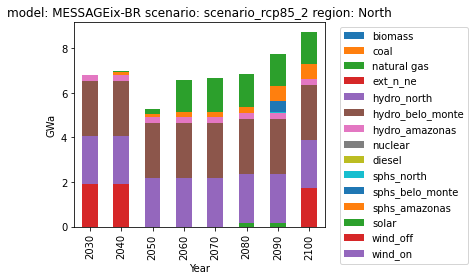

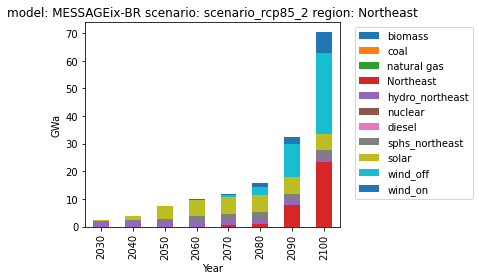

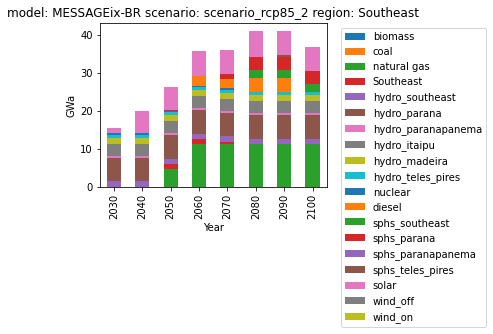

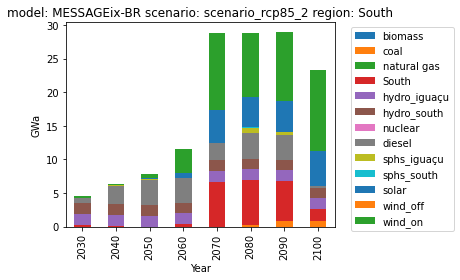

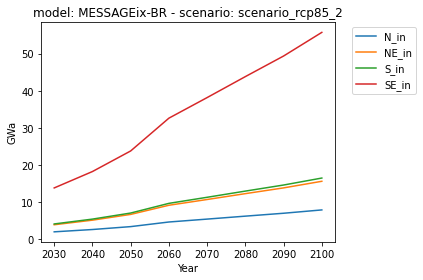

In [66]:
import pyam
from ixmp.reporting import configure
from message_ix.reporting import Reporter
import os
import matplotlib.pyplot as plt
configure(units={'replace': {'-': 'GWa'}})

rep = Reporter.from_scenario(scen)

# plotting years
plotyrs = [x for x in set(scen.set('year')) if x >= scen.firstmodelyear]

rep.set_filters(c = 'electricity')
elec = rep.full_key('out')
elec = elec.drop('yv','m','nd', '')
elec_gen = rep.get(elec)
elec_gen
elec_gen.to_csv('rcp85_bra.csv')

rep.set_filters(c = 'electricity', hd = 'summer')
elec = rep.full_key('out')
elec = elec.drop('yv','m','nd','h')
elec_gen = rep.get(elec)
elec_gen


def collapse_callback(df):
    df['variable'] = 'Electricity Generation|' + df['l']+ '|'+df['t']
    return df.drop(['t','l'], axis =1)

    
new_key = rep.convert_pyam(quantities=elec.drop('h', 'm', 'nd', 'yv'),
                           rename=dict(nl="region", ya="year"),
                           collapse=collapse_callback)
    

    
df_elec = rep.get(new_key)
df_elec.data.unit = 'GWa'
df_elec.to_csv('rcp85_bra.csv')


elec_gen = pd.read_csv("rcp85_bra.csv")
elec_gen.columns 

elec_gen = pyam.IamDataFrame(data='rcp85_bra.csv', encoding='ISO-8859-1')


### North

elec = elec_gen.filter(region=['North'], variable='Electricity Generation|secondary|*', year=plotyrs)
elec.plot.bar(stacked=True)
rename = {'bio_ppl': 'biomass',
          'coal_ppl': 'coal',
          'gas_ppl': 'natural gas',
          'oil_ppl': 'diesel',
          'solar_pv_ppl': 'solar',
          'wind_ppl_on': 'wind_on',
          'wind_ppl_off': 'wind_off',
          'nuc_ppl': 'nuclear',
          'pump_sphs_4': 'sphs_north',
          'pump_sphs_8': 'sphs_belo_monte',
          'pump_sphs_9': 'sphs_amazonas',
          'hydro_4': 'hydro_north',
          'hydro_8': 'hydro_belo_monte',
          'hydro_9': 'hydro_amazonas',
          'grid1': 'ext_n_ne'
          }
#elec.plot.bar(stacked=True)
ax = plt.gca()
h, lgs = ax.get_legend_handles_labels()
ax.legend(labels=[rename[x.split("secondary|")[1]] for x in lgs], bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.ylabel("GWa")
plt.show()

### Northeast
elec = elec_gen.filter(region=['Northeast'], variable='Electricity Generation|secondary|*', year=plotyrs)
elec.plot.bar(stacked=True)
rename = {'bio_ppl': 'biomass',
          'coal_ppl': 'coal',
          'gas_ppl': 'natural gas',
          'oil_ppl': 'diesel',
          'solar_pv_ppl': 'solar',
          'wind_ppl_on': 'wind_on',
          'wind_ppl_off': 'wind_off',
          'nuc_ppl': 'nuclear',
          'hydro_3': 'hydro_northeast',
          'pump_sphs_3': 'sphs_northeast',
          'grid2': 'Northeast',
          }
#elec.plot.bar(stacked=True)
ax = plt.gca()
h, lgs = ax.get_legend_handles_labels()
ax.legend(labels=[rename[x.split("secondary|")[1]] for x in lgs], bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.ylabel("GWa")
plt.show()

### Southeast

elec = elec_gen.filter(region=['Southeast'], variable='Electricity Generation|secondary|*', year=plotyrs)
elec.plot.bar(stacked=True)
rename = {'bio_ppl': 'biomass',
          'coal_ppl': 'coal',
          'gas_ppl': 'natural gas',
          'oil_ppl': 'diesel',
          'solar_pv_ppl': 'solar',
          'wind_ppl_on': 'wind_on',
          'wind_ppl_off': 'wind_off',
          'nuc_ppl': 'nuclear',
          'pump_sphs_1': 'sphs_southeast',
          'pump_sphs_5': 'sphs_itaipu',
          'pump_sphs_6': 'sphs_madeira',
          'pump_sphs_7': 'sphs_teles_pires',
          'pump_sphs_10': 'sphs_parana',
          'pump_sphs_12': 'sphs_paranapanema',
          'hydro_1': 'hydro_southeast',
          'hydro_5': 'hydro_itaipu',
          'hydro_6': 'hydro_madeira',
          'hydro_7': 'hydro_teles_pires',
          'hydro_10': 'hydro_parana',
          'hydro_12': 'hydro_paranapanema',
          'grid3': 'Southeast',
          }
#elec.plot.bar(stacked=True)
ax = plt.gca()
h, lgs = ax.get_legend_handles_labels()
ax.legend(labels=[rename[x.split("secondary|")[1]] for x in lgs], bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.ylabel("GWa")
plt.show()

### South

elec = elec_gen.filter(region=['South'], variable='Electricity Generation|secondary|*', year=plotyrs)
elec.plot.bar(stacked=True)
rename = {'bio_ppl': 'biomass',
          'coal_ppl': 'coal',
          'gas_ppl': 'natural gas',
          'oil_ppl': 'diesel',
          'solar_pv_ppl': 'solar',
           'wind_ppl_on': 'wind_on',
          'wind_ppl_off': 'wind_off',
          'nuc_ppl': 'nuclear',
          'pump_sphs_2': 'sphs_south',
          'pump_sphs_11': 'sphs_iguaçu',
          'hydro_2': 'hydro_south',
          'hydro_11': 'hydro_iguaçu',
          'grid4': 'South',
          }
#elec.plot.bar(stacked=True)
ax = plt.gca()
h, lgs = ax.get_legend_handles_labels()
ax.legend(labels=[rename[x.split("secondary|")[1]] for x in lgs], bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.ylabel("GWa")
plt.show()

elec = elec_gen.filter(variable='Electricity Generation|final|*', year=plotyrs)
elec.plot(legend=OUTSIDE_LEGEND['bottom'])
rename = {'grid_n': 'N_in',
          'grid_ne': 'NE_in',
          'grid_s': 'S_in',
          'grid_se': 'SE_in',
           }
#elec.plot.bar(stacked=True)
ax = plt.gca()
h, lgs = ax.get_legend_handles_labels()
ax.legend(labels=[rename[x.split("final|")[1]] for x in lgs], bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.ylabel("GWa")
plt.show()

In [67]:
rep.set_filters(c = 'water_11')

Text(0, 0.5, 'GWa')

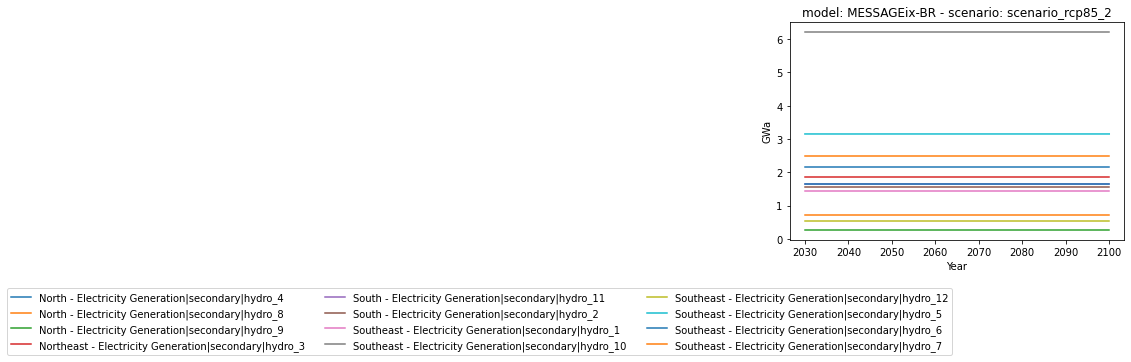

In [68]:
elec = elec_gen.filter(variable='Electricity Generation|secondary|hydro*', year=plotyrs)
elec.plot(legend=OUTSIDE_LEGEND['bottom'])
plt.ylabel("GWa")

Text(0, 0.5, 'GWa')

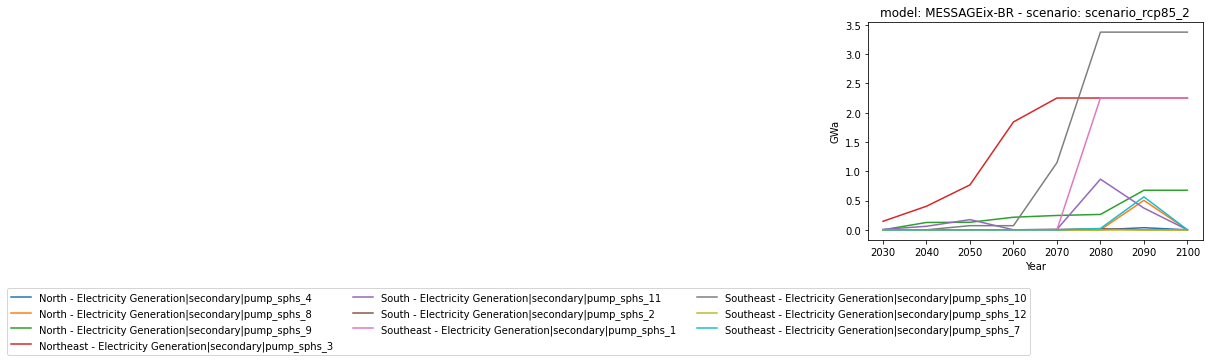

In [69]:
elec = elec_gen.filter(variable='Electricity Generation|secondary|pump_sphs*', year=plotyrs)
elec.plot(legend=OUTSIDE_LEGEND['bottom'])
plt.ylabel("GWa")

Text(0, 0.5, 'GWa')

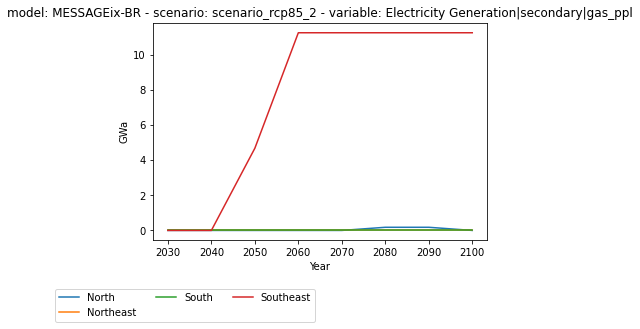

In [70]:
elec = elec_gen.filter(variable='Electricity Generation|secondary|gas_ppl', year=plotyrs)
elec.plot(legend=OUTSIDE_LEGEND['bottom'])
plt.ylabel("GWa")

Text(0, 0.5, 'GWa')

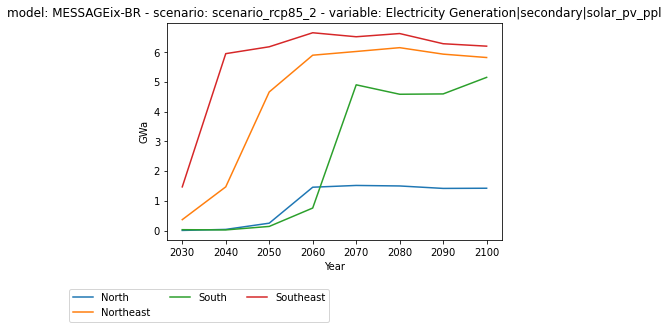

In [71]:
elec = elec_gen.filter(variable='Electricity Generation|secondary|solar_pv_ppl', year=plotyrs)
elec.plot(legend=OUTSIDE_LEGEND['bottom'])
plt.ylabel("GWa")

In [72]:
#mp.close_db()